In [0]:
!pip install keras
!pip install tensorflow==2.8.2
# !pip install autots
# !pip install pmdarima
# !pip install openpyxl
# !pip install geopy

Requirement already satisfied: keras in /databricks/python3/lib/python3.8/site-packages (2.8.0)
 WARNING: You are using pip version 21.0.1; however, version 23.2.1 is available.
You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command. 
Requirement already satisfied: tensorflow==2.8.2 in /databricks/python3/lib/python3.8/site-packages (2.8.2)
Requirement already satisfied: flatbuffers>=1.12 in /databricks/python3/lib/python3.8/site-packages (from tensorflow==2.8.2) (23.5.26)
Requirement already satisfied: typing-extensions>=3.6.6 in /databricks/python3/lib/python3.8/site-packages (from tensorflow==2.8.2) (4.7.1)
Requirement already satisfied: grpcio<2.0,>=1.24.3 in /databricks/python3/lib/python3.8/site-packages (from tensorflow==2.8.2) (1.57.0)
Requirement already satisfied: google-pasta>=0.1.1 in /databricks/python3/lib/python3.8/site-packages (from tensorflow==2.8.2) (0.2.0)
Requirement already satisfied: absl-py>=0.4.0 in /databricks/python3/lib/python3.8/site-packages (from tensorflow==2.8.2) (1.4.0)
Requirement already satisfied: termcolor>=1.1.0 in /databricks/python3/lib/python3.8/site-packages (from tensorflow==2.8.2) (2.3.0)
Requirement already satisfied: six>=1.12.0 in /databricks/python3/lib/python3.8/site-packages (from tensorflow==2.8.2) (1.15.0)
Requirement already satisfied: wrapt>=1.11.0 in /databricks/python3/lib/python3.8/site-packages (from tensorflow==2.8.2) (1.15.0)
Requirement already satisfied: libclang>=9.0.1 in /databricks/python3/lib/python3.8/site-packages (from tensorflow==2.8.2) (16.0.6)
Requirement already satisfied: setuptools in /usr/local/lib/python3.8/dist-packages (from tensorflow==2.8.2) (52.0.0)
Requirement already satisfied: tensorflow-io-gcs-filesystem>=0.23.1 in /databricks/python3/lib/python3.8/site-packages (from tensorflow==2.8.2) (0.33.0)
Requirement already satisfied: tensorflow-estimator<2.9,>=2.8 in /databricks/python3/lib/python3.8/site-packages (from tensorflow==2.8.2) (2.8.0)
Requirement already satisfied: tensorboard<2.9,>=2.8 in /databricks/python3/lib/python3.8/site-packages (from tensorflow==2.8.2) (2.8.0)
Requirement already satisfied: keras-preprocessing>=1.1.1 in /databricks/python3/lib/python3.8/site-packages (from tensorflow==2.8.2) (1.1.2)
Requirement already satisfied: numpy>=1.20 in /databricks/python3/lib/python3.8/site-packages (from tensorflow==2.8.2) (1.22.4)
Requirement already satisfied: opt-einsum>=2.3.2 in /databricks/python3/lib/python3.8/site-packages (from tensorflow==2.8.2) (3.3.0)
Requirement already satisfied: h5py>=2.9.0 in /databricks/python3/lib/python3.8/site-packages (from tensorflow==2.8.2) (3.9.0)
Requirement already satisfied: gast>=0.2.1 in /databricks/python3/lib/python3.8/site-packages (from tensorflow==2.8.2) (0.5.4)
Requirement already satisfied: keras<2.9,>=2.8.0rc0 in /databricks/python3/lib/python3.8/site-packages (from tensorflow==2.8.2) (2.8.0)
Requirement already satisfied: astunparse>=1.6.0 in /databricks/python3/lib/python3.8/site-packages (from tensorflow==2.8.2) (1.6.3)
Requirement already satisfied: protobuf<3.20,>=3.9.2 in /databricks/python3/lib/python3.8/site-packages (from tensorflow==2.8.2) (3.17.2)
Requirement already satisfied: wheel<1.0,>=0.23.0 in /databricks/python3/lib/python3.8/site-packages (from astunparse>=1.6.0->tensorflow==2.8.2) (0.36.2)
Requirement already satisfied: google-auth<3,>=1.6.3 in /databricks/python3/lib/python3.8/site-packages (from tensorboard<2.9,>=2.8->tensorflow==2.8.2) (2.22.0)
Requirement already satisfied: werkzeug>=0.11.15 in /databricks/python3/lib/python3.8/site-packages (from tensorboard<2.9,>=2.8->tensorflow==2.8.2) (2.3.7)
Requirement already satisfied: requests<3,>=2.21.0 in /databricks/python3/lib/python3.8/site-packages (from tensorboard<2.9,>=2.8->tensorflow==2.8.2) (2.25.1)
Requirement already satisfied: google-auth-oauthlib<0.5,>=0.4.1 in /databricks/python3/lib/python3.8/site-packages (from tensorbo

In [0]:
import pandas as pd
import numpy as np
import os
from keras.preprocessing.sequence import TimeseriesGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from sklearn.linear_model import BayesianRidge
from sklearn.pipeline import make_pipeline
import xgboost as xgb
from sklearn.model_selection import KFold,RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error
import scipy.stats as st
import json


In [0]:
username = dbutils.secrets.get(scope="DBX_SECRETS",key="DATABASE-USERNAME")
password = dbutils.secrets.get(scope="DBX_SECRETS",key="DATABASE-PASSWORD")
server_name = dbutils.secrets.get(scope="DBX_SECRETS",key="DATABASE-SERVERNAME")
database_name = dbutils.secrets.get(scope="DBX_SECRETS",key="DATABASE-NAME")
url = server_name + ";" + "databaseName=" + database_name + ";"# READ FROM A SQL TABLE TO A PySpark Dataframe

land_username = dbutils.secrets.get(scope="DBX_SECRETS",key="DATABASE-LAND-USERNAME")
land_password = dbutils.secrets.get(scope="DBX_SECRETS",key="DATABASE-LAND-PASSWORD")


url = server_name+":1433;database="+database_name+";"
props = {"user": username, "password": password}
filename = 'xgboost_grid_search_10012023'

In [0]:
def read_folder(csv_folder,file_type):
  files = os.listdir(csv_folder)
  df = []
  for f in files:
      print(f)
      csv_file = csv_folder + "/" + f
      if file_type == 'csv':
        quaterly_rental = pd.read_csv(csv_file)
      if file_type == 'xlsx':
        quaterly_rental = pd.read_excel(csv_file)
      print(quaterly_rental.shape)
      if 'transactions_2020_2025' in f:
        quaterly_rental.rename(columns={'area_name_en':'Area','procedure_area':'Property Size (sq.m)','actual_worth':'Amount' ,'property_type_en':'Property Type','instance_date':'Transaction Date'},inplace=True)
        
      df.append(quaterly_rental)

  df_full = pd.concat(df, ignore_index=True)
  return df_full


def read_df(table_name, show= False):
  '''
  This function will read the dataframe from database once table name is provided. Rest of the parameters are globally defined. 
  Arguments:
  table_name -- table name
  show -- show output
  '''
  
  sqlResultsDF = spark.read \
          .format("com.microsoft.sqlserver.jdbc.spark") \
          .option("url", url) \
          .option("dbtable", table_name) \
          .option("user", username) \
          .option("password", password).load()
  
  if show:
    sqlResultsDF.show(10)
  
  return sqlResultsDF


def read_query(query, show= False):
  '''
  This function will read the dataframe from database once table name is provided. Rest of the parameters are globally defined. 
  Arguments:
  table_name -- table name
  show -- show output
  '''
  
  sqlResultsDF = spark.read \
          .format("com.microsoft.sqlserver.jdbc.spark") \
          .option("url", url) \
          .option("query", query) \
          .option("user", username) \
          .option("password", password).load()
  if show:
    sqlResultsDF.show(10)
  
  return sqlResultsDF


  def clean_inv(x):
        try:
          all_x=x.split('-')
          new_x=str(all_x[0])+'-'+str(all_x[1])+'-'+str(all_x[2])+'-'+str(all_x[3])+'-'+str(all_x[4])
          return new_x
        except:
          return("")

In [0]:
redin_sales = read_df('reidin.base_transaction_raw_sales').toPandas()

redin_sales.rename(columns={'location_name':'DSC Area','area_name_en':'DLD Area','size':'Property Size (sq.ft)','price':'Amount','price_per_size':'sales_price_per_sqft' ,'type_name':'Property Type','subtype_name':'Property Sub Type','transaction_type':'Registration type','date':'Transaction Date','property_name':'PropertyName','unit':'Unit'},inplace=True)

redin_sales = redin_sales[['DSC Area','property_id','PropertyName','Unit','Transaction Date','sales_seqence','Registration type','Property Type','Property Sub Type','no_of_rooms','developer','Amount','Property Size (sq.ft)','balcony_area','sales_price_per_sqft']]

redin_sales = redin_sales[redin_sales['Property Type']=='Residential']
print(len(redin_sales[redin_sales['DSC Area']=='Jebel Ali First']))
redin_sales = redin_sales[redin_sales['Property Sub Type'].isin(['Apartment','Villa'])]
print(len(redin_sales[redin_sales['DSC Area']=='Jebel Ali First']))
redin_sales = redin_sales[redin_sales['Registration type'].isin(['Sales - Off-Plan', 'Sales - Ready'])]
print(len(redin_sales[redin_sales['DSC Area']=='Jebel Ali First']))


print(redin_sales.shape)
print(len(redin_sales[redin_sales['DSC Area']=='Jebel Ali']))
redin_sales = redin_sales[(redin_sales['Property Size (sq.ft)']!=0)&(redin_sales['Property Size (sq.ft)'].notnull())]
print("Removed 0 and null property sizes",redin_sales.shape)

redin_sales['sales_price_per_sqft'] = redin_sales['sales_price_per_sqft'].astype(float)
redin_sales['Property Size (sq.ft)'] = redin_sales['Property Size (sq.ft)'].astype(float)
redin_sales['Amount'] = redin_sales['Amount'].astype(float)
redin_sales = redin_sales.loc[redin_sales['sales_price_per_sqft'].notnull(),]
print(len(redin_sales[redin_sales['DSC Area']=='Jebel Ali First']))
redin_sales = redin_sales.loc[redin_sales['sales_price_per_sqft']>0,]
print(len(redin_sales[redin_sales['DSC Area']=='Jebel Ali First']))

print("Total transactions remaining after removal of negative and null sales_price_per_sqft = ",redin_sales.shape)


# redin_sales = redin_sales.loc[redin_sales['trans_group_en']=='Sale']
redin_sales = redin_sales[~((redin_sales['PropertyName'].isnull())&(redin_sales['Unit'].isnull()))]
print(len(redin_sales[redin_sales['DSC Area']=='Jebel Ali First']))
print("Removed null property name and unit combns",redin_sales.shape)
# redin_sales[redin_sales.duplicated(['PropertyName','Unit'])].sort_values(['PropertyName','Unit'])


redin_sales['Transaction Date'] = pd.to_datetime(redin_sales['Transaction Date'])
redin_sales.sort_values(['property_id','Unit','Transaction Date'],ascending=True,inplace=True)


# redin_sales.drop_duplicates(['property_id','Unit'],keep='first',inplace=True)
# print("Filtered for first transaction of each unit",redin_sales.shape)

redin_sales['Transaction Year'] = redin_sales['Transaction Date'].dt.year
redin_sales['Transaction Month'] = redin_sales['Transaction Date'].dt.month
redin_sales['Month Year'] = redin_sales['Transaction Month'].astype(str)+'-'+ redin_sales['Transaction Year'].astype(str)
redin_sales['Transaction Year'].value_counts()

# redin_sales = redin_sales[redin_sales['no_of_rooms'].notnull()]
print(len(redin_sales[redin_sales['DSC Area']=='Jebel Ali First']))

print("Removed null unit types",redin_sales.shape)


redin_sales = redin_sales[redin_sales['developer'].notnull()]
print(len(redin_sales[redin_sales['DSC Area']=='Jebel Ali']))

print("Removed null developer names",redin_sales.shape)


#redin_sales = redin_sales[redin_sales['Unit'].notnull()]
print("Removed null unit nos",redin_sales.shape)


#### needs to be discussed with business
redin_sales['Profile'] = 'Competition'
redin_sales.loc[redin_sales['developer'] == 'Al Wasl Properties PJSC','Profile'] = 'WASL'

unit_type_mapping_apartment = {'3':'F3B', '2':'F2B', '1':'F1B', '0':'Studio', '4':'F4B+', '5':'F4B+', '6':'F4B+', 'PENTHOUSE':'F4B+',np.nan:'n/a',None:'n/a','7':'F4B+','8':'F4B+','9':'F4B+'}
# unit_type_mapping_villa = {'3':'F3B', '2':'F2B', '1':'F1B', '0':'Studio', '4':'F4B', '5':'F5B', '6':'F6B+', 'PENTHOUSE':'F6B+',np.nan:'n/a',None:'n/a','7':'F6B+','8':'F6B+','9':'F6B+'}
unit_type_mapping_villa = {'3':'V3B', '2':'V2B', '1':'V1B', '0':'Studio', '4':'V4B', '5':'V5B', '6':'V6B+', 'PENTHOUSE':'V6B+',np.nan:'n/a',None:'n/a','7':'V6B+','8':'V6B+','9':'V6B+'}

#redin_sales['UnitType_clean'] = redin_sales['no_of_rooms'].map(unit_type_mapping_apartment)
redin_sales.loc[redin_sales['Property Sub Type'] == 'Apartment', 'UnitType_clean'] = redin_sales.loc[redin_sales['Property Sub Type'] == 'Apartment', 'no_of_rooms'].map(unit_type_mapping_apartment)
redin_sales.loc[redin_sales['Property Sub Type'] == 'Villa', 'UnitType_clean'] = redin_sales.loc[redin_sales['Property Sub Type'] == 'Villa', 'no_of_rooms'].map(unit_type_mapping_villa)

# redin_sales.rename(columns={'no_of_rooms':'UnitType_clean'},inplace=True)

redin_sales['UnitNo'] = redin_sales['PropertyName']+redin_sales['Unit']

redin_sales['Transaction Date'] = redin_sales['Transaction Date'].dt.date

#clean location 
maping_loc = {'Dubai South': 'Dubai South (Dubai World Central)'}
redin_sales['DSC Area'] = redin_sales['DSC Area'].replace(maping_loc)


redin_sales['Transaction Date'] = pd.to_datetime(redin_sales['Transaction Date'])
redin_sales['Month Year'] = redin_sales['Transaction Date'].dt.to_period('M').dt.to_timestamp()

calculation_group = ['DSC Area','Property Sub Type','UnitType_clean','Month Year']
# calculation_group = ['Month Year']
freehold_kpis = redin_sales.groupby(calculation_group).agg(total_transactions=('property_id','count')).reset_index()
freehold_kpis

1094
1094
1094
(300903, 15)
0
Removed 0 and null property sizes (300903, 15)
1094
1094
Total transactions remaining after removal of negative and null sales_price_per_sqft = (300903, 15)
1094
Removed null property name and unit combns (300857, 15)
1094
Removed null unit types (300857, 18)
0
Removed null developer names (300314, 18)
Removed null unit nos (300314, 18)
Out[166]:

,DSC Area,Property Sub Type,UnitType_clean,Month Year,total_transactions
0,Al Barari,Apartment,F1B,2018-04-01,1
1,Al Barari,Apartment,F1B,2019-02-01,1
2,Al Barari,Apartment,F1B,2019-03-01,1
3,Al Barari,Apartment,F1B,2019-05-01,1
4,Al Barari,Apartment,F1B,2019-07-01,1
...,...,...,...,...,...
21181,Zaabeel First,Apartment,F3B,2023-03-01,1
21182,Zaabeel First,Apartment,F3B,2023-07-01,1
21183,Zaabeel First,Apartment,F4B+,2022-09-01,1
21184,Zaabeel First,Apartment,F4B+,2023-01-01,1


In [0]:
freehold_kpis_sub = freehold_kpis[['DSC Area','Property Sub Type','UnitType_clean','Month Year','total_transactions']]
freehold_kpis_sub['Month Year'] = pd.to_datetime(freehold_kpis_sub['Month Year'])
freehold_kpis_sub = freehold_kpis_sub.sort_values(['DSC Area','Property Sub Type','UnitType_clean','Month Year'])

In [0]:
df = freehold_kpis_sub[['DSC Area','Property Sub Type','UnitType_clean']].drop_duplicates().copy()

start_date = '2013-01-01'
end_date = '2023-06-01'

# Generate the date range DataFrame
date_df = pd.DataFrame({'date': pd.date_range(start=start_date, end=end_date, freq='MS')})

# Add a constant dummy column to both DataFrames
df['dummy'] = 1
date_df['dummy'] = 1

# Perform a merge to create a cross join
cross_join_df = pd.merge(df, date_df, on='dummy')

# Drop the dummy column
cross_join_df = cross_join_df.drop('dummy', axis=1)
cross_join_df

Out[168]:

,DSC Area,Property Sub Type,UnitType_clean,date
0,Al Barari,Apartment,F1B,2013-01-01
1,Al Barari,Apartment,F1B,2013-02-01
2,Al Barari,Apartment,F1B,2013-03-01
3,Al Barari,Apartment,F1B,2013-04-01
4,Al Barari,Apartment,F1B,2013-05-01
...,...,...,...,...
79249,Zaabeel First,Apartment,F4B+,2023-02-01
79250,Zaabeel First,Apartment,F4B+,2023-03-01
79251,Zaabeel First,Apartment,F4B+,2023-04-01
79252,Zaabeel First,Apartment,F4B+,2023-05-01


In [0]:
cross_join_df[(cross_join_df['DSC Area']=='Al Barari')&(cross_join_df['Property Sub Type']=='Apartment')&(cross_join_df['UnitType_clean']=='F1B')]
cross_join_df.rename(columns={'date':'Month Year'},inplace=True)
freehold_kpis_sub = cross_join_df.merge(freehold_kpis_sub,on=['DSC Area','Property Sub Type','UnitType_clean','Month Year'],how='left')
freehold_kpis_sub.loc[freehold_kpis_sub['total_transactions'].isnull(),'total_transactions'] = 0

In [0]:
sales_transactions_dld = pd.read_csv('/dbfs/FileStore/shared_uploads/a.singh@wasl.ae/Land Use Cases/Market Trend Monitoring/Sales_Transactions_DLD_06072023.csv')
sales_transactions_dld['instance_date'] = pd.to_datetime(sales_transactions_dld['instance_date'])
sales_transactions_dld['transaction_month'] = sales_transactions_dld['instance_date'].dt.to_period('M').dt.to_timestamp()
sales_transactions_dld = sales_transactions_dld[sales_transactions_dld['trans_group_en']=='Sales']
sales_transactions_dld = sales_transactions_dld[sales_transactions_dld['property_type_en'].isin(['Unit','Villa'])]
# sales_transactions_dld = sales_transactions_dld[sales_transactions_dld['property_sub_type_en'].isin([ 'Flat', 'Hotel Rooms', 'Hotel Apartment', 'Villa', 'Office','Shop'])]

# sales_transactions_dld = sales_transactions_dld[sales_transactions_dld['transaction_month']==pd.to_datetime('2022-08-01')]
print(sales_transactions_dld.shape)
sales_transactions_dld = sales_transactions_dld[sales_transactions_dld['property_usage_en'].isin(['Residential'])]
print(sales_transactions_dld.shape)


### Filtering for only business bay (Remove if you want other areas)
sales_transactions_dld = sales_transactions_dld[(sales_transactions_dld['area_name_en']=='Business Bay')]


sales_transactions_dld['trans_group_en'].unique()
sales_transactions_dld['property_sub_type_en'].unique()
print(sales_transactions_dld['property_type_en'].unique())
print(sales_transactions_dld['rooms_en'].unique())

unit_type_mapping = {'1 B/R':'F1B', '2 B/R':'F2B', 'Studio':'Stuido', '3 B/R':'F3B', '4 B/R':'F4B+', 'PENTHOUSE' '5 B/R':'F4B+',
 'Single Room':'F1B', '6 B/R':'F4B+', 'Shop':'Shop', '7 B/R':'F4B+', '8 B/R':'F4B+', '9 B/R':'F4B+', 'Office':'Office'}

property_type_en_map = {'Unit':'Apartment', 'Villa':'Villa'}


sales_transactions_dld['UnitType_clean'] =  sales_transactions_dld['rooms_en'].map(unit_type_mapping)
print(sales_transactions_dld['UnitType_clean'].unique())

sales_transactions_dld['Property Sub Type'] =  sales_transactions_dld['property_type_en'].map(property_type_en_map)
print(sales_transactions_dld['Property Sub Type'].unique())


# sales_transactions_dld['property_usage_en'].unique()
# sales_transactions_dld = sales_transactions_dld[(sales_transactions_dld['area_name_en']=='Business Bay')&(sales_transactions_dld['rooms_en']=='1 B/R')&(sales_transactions_dld['property_sub_type_en']=='Flat')]

# # print(sales_transactions_dld['Property Type'].unique())
# calculation_group = ['transaction_month']

sales_transactions_dld.rename(columns={'area_name_en':'DSC Area'},inplace=True)
calculation_group = ['DSC Area','Property Sub Type','UnitType_clean','transaction_month']
# calculation_group = ['transaction_month']
avg_sales_price = sales_transactions_dld.groupby(calculation_group).agg(total_transactions = ('transaction_id','nunique')).reset_index()

avg_sales_price = avg_sales_price[avg_sales_price['transaction_month']<pd.to_datetime('2018-01-01')]
avg_sales_price.rename(columns = {'transaction_month':'Month Year'},inplace=True)


avg_sales_price = avg_sales_price[avg_sales_price['Month Year']<pd.to_datetime('2018-01-01')]
# freehold_kpis_sub = avg_sales_price.append(freehold_kpis_sub,ignore_index=True)
freehold_kpis_sub = avg_sales_price.append(freehold_kpis,ignore_index=True)


(749092, 47)
(634073, 47)
['Unit']
['1 B/R' 'Studio' '3 B/R' '4 B/R' '2 B/R' nan '5 B/R' 'PENTHOUSE' '6 B/R'
 'Office']
['F1B' 'Stuido' 'F3B' 'F4B+' 'F2B' nan 'Office']
['Apartment']

In [0]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['quarter'] = df['Month Year'].dt.quarter
    df['month'] = df['Month Year'].dt.month
    df['year'] = df['Month Year'].dt.year
    return df

freehold_kpis_sub = create_features(freehold_kpis_sub)
freehold_kpis_sub

pd.set_option('DISPLAY.MAX_ROWS',250)
freehold_kpis_sub.head()

Out[171]:

,DSC Area,Property Sub Type,UnitType_clean,Month Year,total_transactions,quarter,month,year
0,Business Bay,Apartment,F1B,2006-12-01,2,4,12,2006
1,Business Bay,Apartment,F1B,2008-04-01,1,2,4,2008
2,Business Bay,Apartment,F1B,2009-01-01,129,1,1,2009
3,Business Bay,Apartment,F1B,2009-02-01,12,1,2,2009
4,Business Bay,Apartment,F1B,2009-03-01,11,1,3,2009


Out[172]:

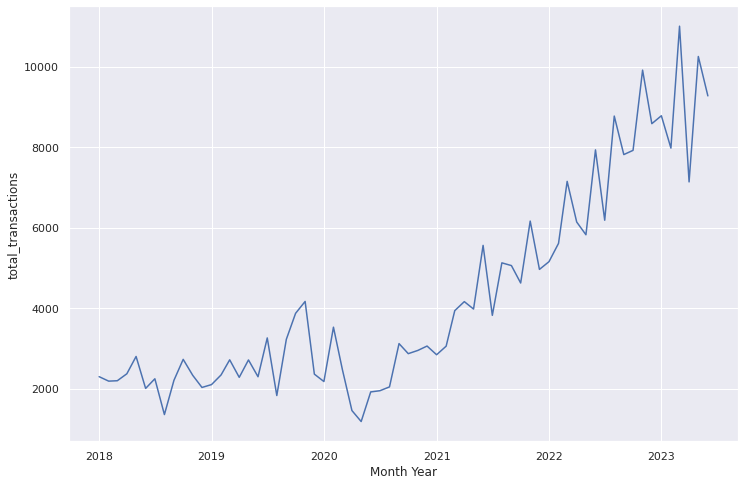

<AxesSubplot:xlabel='Month Year', ylabel='total_transactions'>

In [0]:
### Put filters for location, unit type etc. 
data_1 = freehold_kpis_sub[(freehold_kpis_sub['Month Year']>=pd.to_datetime('2018-01-01'))&(freehold_kpis_sub['Month Year']<=pd.to_datetime('2023-06-01'))].copy()

data=data_1.groupby(['Month Year']).agg({'total_transactions':'sum'}).reset_index()

# data = freehold_kpis_sub
data.set_index(['Month Year'],inplace=True)

sns.set(rc={'figure.figsize':(12,8)})
sns.lineplot(x=data.index, y=data['total_transactions'])


Out[173]:

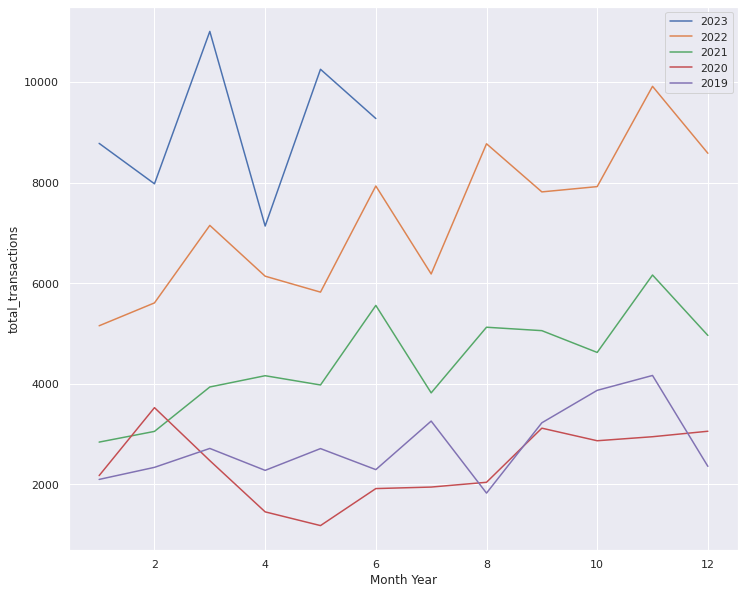

<AxesSubplot:xlabel='Month Year', ylabel='total_transactions'>

In [0]:
## 2023
data1 = data[data.index>='2023-01-01']

sns.set(rc={'figure.figsize':(12,10)})
sns.lineplot(x=data1.index.month, y=data1['total_transactions'],label='2023')

## 2022
data1 = data[(data.index>='2022-01-01') & (data.index<'2023-01-01') ]

sns.set(rc={'figure.figsize':(12,10)})
sns.lineplot(x=data1.index.month, y=data1['total_transactions'],label='2022')

## 2021
data1 = data[(data.index>='2021-01-01') & (data.index<'2022-01-01') ]

sns.set(rc={'figure.figsize':(12,10)})
sns.lineplot(x=data1.index.month, y=data1['total_transactions'],label='2021')

## 2020    --- Let's Remove
data1 = data[(data.index>='2020-01-01') & (data.index<'2021-01-01') ]

sns.set(rc={'figure.figsize':(12,10)})
sns.lineplot(x=data1.index.month, y=data1['total_transactions'],label='2020')

## 2019
data1 = data[(data.index>='2019-01-01') & (data.index<'2020-01-01') ]

sns.set(rc={'figure.figsize':(12,10)})
sns.lineplot(x=data1.index.month, y=data1['total_transactions'],label='2019')

# ## 2018.  --- Let's Remove
# data1 = data[(data.index>='2018-01-01') & (data.index<'2019-01-01') ]

# sns.set(rc={'figure.figsize':(12,10)})
# sns.lineplot(x=data1.index.month, y=data1['total_transactions'],label='2018')

# ## 2017   --- Let's Remove
# data1 = data[(data.index>='2017-01-01') & (data.index<'2018-01-01') ]

# sns.set(rc={'figure.figsize':(12,8)})
# sns.lineplot(x=data1.index.month, y=data1['total_transactions'],label='2017')

In [0]:
## 2023
data1 = data[data.index>='2023-01-01']
## 2022
data2 = data[(data.index>='2022-01-01') & (data.index<'2023-01-01') ]
## 2021
data3 = data[(data.index>='2021-01-01') & (data.index<'2022-01-01') ]
## 2019
data4 = data[(data.index>='2019-01-01') & (data.index<'2020-01-01') ]
## 2018
data5 = data[(data.index>='2018-01-01') & (data.index<'2019-01-01') ]


data_final= pd.concat([data1,data2,data3,data4,data5])

data_final.rename(columns={'total_transactions':'Production'},inplace=True)
data_final=data_final.sort_index()

In [0]:
# ## Original Data
orig_index=data_final.index
df_1=data_final[['Production']]



## Exchanges
stock_rates= pd.read_csv('/dbfs/FileStore/shared_uploads/psarkar@wasl.ae/stock_exchange_data.csv')
stock_rates['Date'] = pd.to_datetime(stock_rates['Date'])
stock_rates['Month']= stock_rates['Date'].dt.month
stock_rates['Year']= stock_rates['Date'].dt.year

stock_rates['Bitcoin']= stock_rates['Bitcoin'].str.replace(',','').astype('float')
stock_rates['Dow Jones']= stock_rates['Dow Jones'].replace(',','').astype('float')
stock_rates['FTSE']= stock_rates['FTSE'].str.replace(',','').astype('float')
stock_rates['Karachi']= stock_rates['Karachi'].str.replace(',','').astype('float')
stock_rates['Nasdaq']= stock_rates['Nasdaq'].str.replace(',','').astype('float')
stock_rates['Nifty']= stock_rates['Nifty'].str.replace(',','').astype('float')
stock_rates['Shanghai']= stock_rates['Shanghai'].str.replace(',','').astype('float')



stock_rates_grp=stock_rates.groupby(['Month', 'Year']).agg({'Bitcoin':'mean', 'Dow Jones':'mean', 'FTSE':'mean', 'Karachi':'mean', 'Nasdaq':'mean', 'Nifty':'mean','Shanghai':'mean'}).reset_index()
stock_rates_grp['Day']=1
stock_rates_grp['Month Year']=pd.to_datetime(stock_rates_grp[['Year', 'Month','Day']])
stock_rates_grp=stock_rates_grp.drop(['Year','Month','Day'],axis=1)

## Global Indexes
global_indexes = pd.read_excel('/dbfs/FileStore/shared_uploads/a.singh@wasl.ae/Land Use Cases/Market Trend Monitoring/blackrock.xlsx')
global_indexes['Month Year'] = pd.to_datetime(global_indexes['Date'])
global_indexes['Month Year'] = global_indexes['Date'].dt.to_period('M').dt.to_timestamp()
global_indexes=global_indexes.drop(['Date'],axis=1)

## Risk factors 
risk_factors= pd.read_csv('/dbfs/FileStore/shared_uploads/psarkar@wasl.ae/Risks_Trends.csv')
risk_factors['Day']=1
risk_factors['Month Year']=pd.to_datetime(risk_factors[['Year', 'Month','Day']])
risk_factors=risk_factors.rename(columns={'Unnamed: 4':'Terror Attack Risk'})
risk_factors=risk_factors[['Month Year','Emerging markets cricis','Terror Attack Risk']]

## Other MacroEconomic Factors
macro_factors= pd.read_excel('/dbfs/FileStore/shared_uploads/psarkar@wasl.ae/MacroEconomicTrends.xlsx')
macro_factors['Month']=macro_factors['Date'].dt.month
macro_factors['Year']=macro_factors['Date'].dt.year
macro_factors['Day']=1
macro_factors['Month Year']=pd.to_datetime(macro_factors[['Year', 'Month','Day']])

all_columns=['Crude Oil WTI Futures', 'Dow Jones Commodity Energy',
       'Dow Jones Commodity Petroleum',
       'Dow Jones Commodity Unleaded Gasoline', 'Gasoline RBOB Futures',
       'Gold Futures', 'Natural Gas Futures', 'Bitcoin', 'Cardano', 'Ethereum',
       'Tether', 'EUR_USD', 'GBP_USD', 'Euro Stoxx 50', 'S&P 500',
       'Emerging markets political crisis', 'Russia-NATO conflict',
       'U.S. China strategic competition']
for col in all_columns:
  if str(type(macro_factors[col][0]))!="<class 'numpy.float64'>":
      macro_factors[col]= macro_factors[col].str.replace(',','')
  macro_factors[col]= macro_factors[col].astype('float')

macro_factors= macro_factors.dropna()

macro_factors_grp=macro_factors.groupby(['Month Year']).agg({'Crude Oil WTI Futures':'mean', 'Dow Jones Commodity Energy':'mean',
       'Dow Jones Commodity Petroleum':'mean',
       'Dow Jones Commodity Unleaded Gasoline':'mean', 'Gasoline RBOB Futures':'mean',
       'Gold Futures':'mean', 'Natural Gas Futures':'mean', 'Bitcoin':'mean', 'Cardano':'mean', 'Ethereum':'mean',
       'Tether':'mean', 'EUR_USD':'mean', 'GBP_USD':'mean', 'Euro Stoxx 50':'mean', 'S&P 500':'mean',
       'Emerging markets political crisis':'mean', 'Russia-NATO conflict':'mean',
       'U.S. China strategic competition':'mean'}).reset_index()

dubai_tourism= pd.read_excel('/dbfs/FileStore/shared_uploads/psarkar@wasl.ae/Dubai_Tourism_Data.xlsx')
dubai_tourism=dubai_tourism.rename(columns={'Month':'Month Year'})

int_rates= pd.read_excel('/dbfs/FileStore/shared_uploads/psarkar@wasl.ae/Rates.xlsx')
int_rates['Month']=int_rates['Date'].dt.month
int_rates['Year']=int_rates['Date'].dt.year
int_rates['Day']=1
int_rates['Month Year']=pd.to_datetime(int_rates[['Year', 'Month','Day']])
int_rates.head(2)

country_macro= pd.read_excel('/dbfs/FileStore/shared_uploads/psarkar@wasl.ae/Country_wise_macro_economic_variables.xlsx')
country_macro=country_macro.rename(columns={'Date':'Month Year'})
country_macro=country_macro.drop(['Inflation Rate India'],axis=1)
country_macro=country_macro.fillna(0)

int_rates_count= pd.read_excel('/dbfs/FileStore/shared_uploads/psarkar@wasl.ae/Interest_Rates_country.xlsx')
int_rates_count['Year']=2000+int_rates_count['Year']
int_rates_count['Month Year']=pd.to_datetime(int_rates_count[['Year', 'Month','Day']])

int_rates_count_grp=int_rates_count.groupby(['Month Year']).agg({'Interest Rate India':'mean','Interest Rates China':'mean','Interest Rates Pakistan':'mean','Interest Rates Russia':'mean','Interest Rates UAE':'mean','Interest Rates UK':'mean'}).reset_index()


india_inflation = pd.read_csv('/dbfs/FileStore/shared_uploads/psarkar@wasl.ae/Macro_Economic_Variables_Free_Hold_Prediction/Inflation_Rate_India.csv')
india_inflation['date']=pd.to_datetime(india_inflation['date'],format='%d/%m/%Y')
india_inflation['Month']=india_inflation['date'].dt.month
india_inflation['Year']=india_inflation['date'].dt.year
india_inflation['Day']=1
india_inflation['Month Year']=pd.to_datetime(india_inflation[['Year', 'Month','Day']])

us_rates = pd.read_excel('/dbfs/FileStore/shared_uploads/psarkar@wasl.ae/Macro_Economic_Variables_Free_Hold_Prediction/Interest_Rates_United_States.xlsx')
us_rates['Date']=pd.to_datetime(us_rates['Date'],format='%b %d, %y')
us_rates ['Month']=us_rates ['Date'].dt.month
us_rates['Year']=us_rates['Date'].dt.year
us_rates['Day']=1
us_rates['Month Year']=pd.to_datetime(us_rates[['Year', 'Month','Day']])


currency_india = pd.read_csv('/dbfs/FileStore/shared_uploads/psarkar@wasl.ae/Macro_Economic_Variables_Free_Hold_Prediction/Currency_India.csv')
currency_india['Date']=pd.to_datetime(currency_india['Date'],format='%m/%d/%Y')
currency_india ['Month']=currency_india['Date'].dt.month
currency_india['Year']=currency_india['Date'].dt.year
currency_india['Day']=1
currency_india['Month Year']=pd.to_datetime(currency_india[['Year', 'Month','Day']])
currency_india_grp=currency_india.groupby(['Month Year']).agg({'AED_INR':'mean','INR_USD':'mean'}).reset_index()

uk_variables = pd.read_excel('/dbfs/FileStore/shared_uploads/psarkar@wasl.ae/Macro_Economic_Variables_Free_Hold_Prediction/UK_Economic_Variables.xlsx')
uk_variables['Day']=1
uk_variables['Month Year']=pd.to_datetime(uk_variables[['Year', 'Month','Day']])
uk_variables['Money Supply M1 UK']= uk_variables['Money Supply M1'].astype('float')
uk_variables['Oil Production UK']= uk_variables['Oil Production UK'].astype('float')
uk_variables['inflation rate']= uk_variables['inflation rate'].str.replace(' %','')
uk_variables['inflation rate UK']= uk_variables['inflation rate'].astype('float')
uk_variables_grp=uk_variables.groupby(['Month Year']).agg({'inflation rate UK':'mean','Money Supply M1 UK':'mean','Oil Production UK':'mean'}).reset_index()


other_df = pd.read_excel('/dbfs/FileStore/shared_uploads/psarkar@wasl.ae/Macro_Economic_Variables_Free_Hold_Prediction/Cotton_prices_Russia_UAE_stock_currencies.xlsx')
other_df['Month']=other_df['Date'].dt.month
other_df['Year']=other_df['Date'].dt.year
other_df['Day']=1
other_df['Month Year']=pd.to_datetime(other_df[['Year', 'Month','Day']])
other_df['Cotton Stocks']= other_df['Cotton Stocks'].astype('float')
other_df['Russia Stocks']= other_df['Russia Stocks'].astype('float')
other_df['UAE Stocks']= other_df['UAE Stocks'].str.replace(',','')
other_df['UAE Stocks']= other_df['UAE Stocks'].astype('float')
other_df['USD_PKR']= other_df['USD_PKR'].astype('float')
other_df['USD_RUB']= other_df['USD_RUB'].astype('float')
other_df_grp=other_df.groupby(['Month Year']).agg({'Cotton Stocks':'mean','Russia Stocks':'mean','UAE Stocks':'mean','USD_PKR':'mean','USD_RUB':'mean'}).reset_index()


visitors = pd.read_excel('/dbfs/FileStore/shared_uploads/psarkar@wasl.ae/Macro_Economic_Variables_Free_Hold_Prediction/Tourtists_Dubai.xlsx')
visitors['Day']=1
visitors['Month Year']=pd.to_datetime(visitors[['Year', 'Month','Day']])
visitors=visitors[['Month Year','Russian Tourists','Pakistan Tourists','Indian Tourists','UK Tourists']]
for col in visitors.columns:
  if col !='Month Year':
    visitors[col]=visitors[col]*1000

new_oil_prod = pd.read_excel('/dbfs/FileStore/shared_uploads/psarkar@wasl.ae/Macro_Economic_Variables_Free_Hold_Prediction/New_Oil_Production.xlsx')
new_oil_prod['Day']=1
new_oil_prod['Month Year']=pd.to_datetime(new_oil_prod[['Year', 'Month','Day']])
new_oil_prod=new_oil_prod.drop(['Date','Month','Year','Day'],axis=1)

russia_stocks = pd.read_csv('/dbfs/FileStore/shared_uploads/psarkar@wasl.ae/Macro_Economic_Variables_Free_Hold_Prediction/Russia_Stock_Market.csv')
russia_stocks['Day']=1
russia_stocks['Month Year']=pd.to_datetime(russia_stocks[['Year', 'Month','Day']])
russia_stocks_grp=russia_stocks.groupby(['Month Year']).agg({'Russia Stock Market':'mean'})

In [0]:
df_2=pd.merge(df_1,stock_rates_grp,on=['Month Year'],how='left')
df_3=pd.merge(df_2,global_indexes,on=['Month Year'],how='left')
df_4=pd.merge(df_3,india_inflation[['Month Year','inflation rate']].rename(columns={'inflation rate':'India inflation'}),on=['Month Year'],how='left')
df_5=pd.merge(df_4,risk_factors,on=['Month Year'],how='left')
df_6=pd.merge(df_5,macro_factors_grp,on=['Month Year'],how='left')
df_7=pd.merge(df_6,dubai_tourism,on=['Month Year'],how='left')
df_8_2=pd.merge(df_7,country_macro,on=['Month Year'],how='left')
df_8_3=pd.merge(df_8_2,int_rates_count_grp,on=['Month Year'],how='left')
df_8_4=pd.merge(df_8_3,us_rates[['Month Year','interest rate']].rename(columns={'interest rate':'Interest Rates US'}),on=['Month Year'],how='left')
df_8_5=pd.merge(df_8_4,uk_variables_grp,on=['Month Year'],how='left')
df_8_6=pd.merge(df_8_5,other_df_grp,on=['Month Year'],how='left')
df_8_7=pd.merge(df_8_6,visitors,on=['Month Year'],how='left')
df_8_7=df_8_7.drop(['Oil Production India', 'Oil Production Italy',
       'Oil Production Pakistan', 'Oil Production Russia','Oil Production China','Oil Production France',
       'Oil Production UAE','Oil Production UK','Russia Stocks','Old Date','Interest Rate France','Money Supply M1 UAE'],axis=1) 
df_8_8=pd.merge(df_8_7,new_oil_prod,on=['Month Year'],how='left')
df_8_9=pd.merge(df_8_8,russia_stocks_grp,on=['Month Year'],how='left')
df_8_1=pd.merge(df_8_8,currency_india_grp,on=['Month Year'],how='left')

#df_8_1=df_8_1.fillna(0)
df_8_1['Interest Rate India']=df_8_1['Interest Rate India'].replace(np.nan,4)
df_8_1['Interest Rates China']=df_8_1['Interest Rates China'].replace(np.nan,df_8_1['Interest Rates China'].mean())
df_8_1['Dubai Overnight Visitors']=df_8_1['Dubai Overnight Visitors'].replace(np.nan,df_8_1['Dubai Overnight Visitors'].mean())

## Replace 0 with Mean's
for cols in df_8_1.columns:
  if cols not in ['Month Year']:  
    df_8_1[cols]=df_8_1[cols].replace(0.0,np.nan)
    df_8_1[cols]=df_8_1[cols].replace(0,np.nan)
    df_8_1[cols]=df_8_1[cols].astype(float)
    df_8_1[cols]=df_8_1[cols].fillna(df_8_1[cols].mean())

# df_8_1.head(2)


In [0]:
#df_8_1 #keep this name as final training data even if we add features

In [0]:
df_8_1.columns

Out[99]: Index(['Month Year', 'Production', 'Bitcoin_x', 'Dow Jones', 'FTSE', 'Karachi',
 'Nasdaq', 'Nifty', 'Shanghai', 'Global Indicator', 'Gulf Tension',
 'India inflation', 'Emerging markets cricis', 'Terror Attack Risk',
 'Crude Oil WTI Futures', 'Dow Jones Commodity Energy',
 'Dow Jones Commodity Petroleum',
 'Dow Jones Commodity Unleaded Gasoline', 'Gasoline RBOB Futures',
 'Gold Futures', 'Natural Gas Futures', 'Bitcoin_y', 'Cardano',
 'Ethereum', 'Tether', 'EUR_USD', 'GBP_USD', 'Euro Stoxx 50', 'S&P 500',
 'Emerging markets political crisis', 'Russia-NATO conflict',
 'U.S. China strategic competition', 'Dubai Overnight Visitors',
 'Gold Reserves China', 'Gold Reserves France', 'Gold Reserves India',
 'Gold Reserves Italy', 'Gold Reserves Pakistan', 'Gold Reserves Russia',
 'Gold Reserves UAE', 'Inflation Rate China', 'Inflation Rate France',
 'Inflation Rate Italy', 'Inflation Rate Pakistan',
 'Inflation Rate Russia', 'Inflation Rate UAE', 'Interest Rate Italy',
 'Money Supply M1 China', 'Money Supply M1 France',
 'Money Supply M1 India', 'Money Supply M1 Italy',
 'Money Supply M1 Pakistan', 'Money Supply M1 Russia',
 'Interest Rate India', 'Interest Rates China',
 'Interest Rates Pakistan', 'Interest Rates Russia',
 'Interest Rates UAE', 'Interest Rates UK', 'Interest Rates US',
 'inflation rate UK', 'Money Supply M1 UK', 'Cotton Stocks',
 'UAE Stocks', 'USD_PKR', 'USD_RUB', 'Russian Tourists',
 'Pakistan Tourists', 'Indian Tourists', 'UK Tourists',
 'China Oil Production', 'UK Oil Production', 'India Oil Production',
 'Pakistan Oil Production', 'Italy Oil Production',
 'Russia Oil Production', 'UAE Oil Production', 'AED_INR', 'INR_USD'],
 dtype='object')

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix =df_8_1.corr()
correlation_matrix.head(1) #production is the total transactions - target variable

Out[140]:

,Production,Bitcoin_x,Dow Jones,FTSE,Karachi,Nasdaq,Nifty,Shanghai,Global Indicator,Gulf Tension,India inflation,Emerging markets cricis,Terror Attack Risk,Crude Oil WTI Futures,Dow Jones Commodity Energy,Dow Jones Commodity Petroleum,Dow Jones Commodity Unleaded Gasoline,Gasoline RBOB Futures,Gold Futures,Natural Gas Futures,Bitcoin_y,Cardano,Ethereum,Tether,EUR_USD,GBP_USD,Euro Stoxx 50,S&P 500,Emerging markets political crisis,Russia-NATO conflict,U.S. China strategic competition,Dubai Overnight Visitors,Gold Reserves China,Gold Reserves France,Gold Reserves India,Gold Reserves Italy,Gold Reserves Pakistan,Gold Reserves Russia,Gold Reserves UAE,Inflation Rate China,Inflation Rate France,Inflation Rate Italy,Inflation Rate Pakistan,Inflation Rate Russia,Inflation Rate UAE,Interest Rate Italy,Money Supply M1 China,Money Supply M1 France,Money Supply M1 India,Money Supply M1 Italy,Money Supply M1 Pakistan,Money Supply M1 Russia,Interest Rate India,Interest Rates China,Interest Rates Pakistan,Interest Rates Russia,Interest Rates UAE,Interest Rates UK,Interest Rates US,inflation rate UK,Money Supply M1 UK,Cotton Stocks,UAE Stocks,USD_PKR,USD_RUB,Russian Tourists,Pakistan Tourists,Indian Tourists,UK Tourists,China Oil Production,UK Oil Production,India Oil Production,Pakistan Oil Production,Italy Oil Production,Russia Oil Production,UAE Oil Production,AED_INR,INR_USD
Production,1.0,0.357241,0.658377,0.337078,0.181969,0.619614,0.852344,0.343672,-0.129359,-0.677207,0.613063,-0.406454,0.170034,0.622892,0.706784,0.676381,0.675783,0.755747,0.777913,0.461021,0.369741,0.190825,0.455605,0.118284,-0.672323,-0.525713,0.621393,0.676194,-0.022119,0.143949,0.240885,0.050017,0.310039,0.775551,0.787671,-0.394641,0.36462,0.327135,0.796957,-0.246566,0.86743,0.890802,0.896202,0.56978,0.295769,0.116398,0.904738,0.688899,0.858271,0.752398,0.887305,0.88937,-0.02954,-0.008496,0.720057,0.240238,0.640201,0.748814,0.470174,0.887292,0.822704,0.38954,0.702678,0.91001,0.324707,0.369941,-0.147286,0.17924,-0.010184,0.839923,-0.813268,-0.788401,-0.440418,-0.00725,-0.517573,0.116062,0.904545,-0.88246


In [0]:
imp_cols=[] #more than 60 percent corr

for col,val in zip(list(correlation_matrix.columns),correlation_matrix['Production']):
  if np.abs(val)>=0.6:
    imp_cols.append(col)

imp_cols.remove('Production')

print(imp_cols)

['Dow Jones', 'Nasdaq', 'Nifty', 'Gulf Tension', 'India inflation', 'Crude Oil WTI Futures', 'Dow Jones Commodity Energy', 'Dow Jones Commodity Petroleum', 'Dow Jones Commodity Unleaded Gasoline', 'Gasoline RBOB Futures', 'Gold Futures', 'EUR_USD', 'Euro Stoxx 50', 'S&P 500', 'Gold Reserves France', 'Gold Reserves India', 'Gold Reserves UAE', 'Inflation Rate France', 'Inflation Rate Italy', 'Inflation Rate Pakistan', 'Money Supply M1 China', 'Money Supply M1 France', 'Money Supply M1 India', 'Money Supply M1 Italy', 'Money Supply M1 Pakistan', 'Money Supply M1 Russia', 'Interest Rates Pakistan', 'Interest Rates UAE', 'Interest Rates UK', 'inflation rate UK', 'Money Supply M1 UK', 'UAE Stocks', 'USD_PKR', 'China Oil Production', 'UK Oil Production', 'India Oil Production', 'AED_INR', 'INR_USD']

In [0]:
df_8_1['Month']=df_8_1['Month Year'].dt.month
df_8_1['Year']=df_8_1['Month Year'].dt.year
df_month=pd.get_dummies(df_8_1['Month'],prefix="Month_")
df_month['Month Year']=df_8_1['Month Year']
df_month.head(2)

Out[177]:

,Month__1,Month__2,Month__3,Month__4,Month__5,Month__6,Month__7,Month__8,Month__9,Month__10,Month__11,Month__12,Month Year
0,1,0,0,0,0,0,0,0,0,0,0,0,2018-01-01
1,0,1,0,0,0,0,0,0,0,0,0,0,2018-02-01


In [0]:
# cols=['Production','Month Year','Year','Dow Jones', 'Nasdaq', 'Nifty', 'Gulf Tension', 'India inflation', 'Crude Oil WTI Futures', 'Dow Jones Commodity Energy', 'Dow Jones Commodity Petroleum', 'Dow Jones Commodity Unleaded Gasoline', 'Gasoline RBOB Futures', 'Gold Futures', 'EUR_USD', 'Euro Stoxx 50', 'S&P 500', 'Gold Reserves France', 'Gold Reserves India', 'Gold Reserves UAE', 'Inflation Rate France', 'Inflation Rate Italy', 'Inflation Rate Pakistan', 'Money Supply M1 China', 'Money Supply M1 France', 'Money Supply M1 India', 'Money Supply M1 Italy', 'Money Supply M1 Pakistan', 'Money Supply M1 Russia', 'Interest Rates Pakistan', 'Interest Rates UAE', 'Interest Rates UK', 'inflation rate UK', 'Money Supply M1 UK', 'UAE Stocks', 'USD_PKR', 'China Oil Production', 'UK Oil Production', 'India Oil Production', 'AED_INR', 'INR_USD']

# Cols after RFE
cols=['Production','Month Year','Year','Dow Jones',
 'Nifty',
 'Gulf Tension',
 'India inflation',
 'Euro Stoxx 50',
 'Gold Reserves India',
 'Gold Reserves UAE',
 'Inflation Rate Italy',
 'Inflation Rate Pakistan',
 'Money Supply M1 China',
 'Money Supply M1 France',
 'Money Supply M1 Italy',
 'Money Supply M1 Pakistan',
 'Interest Rates UK',
 'inflation rate UK',
 'UAE Stocks',
 'China Oil Production',
 'India Oil Production']

df_=df_8_1[cols]

df_8=pd.merge(df_,df_month,on=['Month Year'],how='left')

df_8.head(2)

Out[178]:

,Production,Month Year,Year,Dow Jones,Nifty,Gulf Tension,India inflation,Euro Stoxx 50,Gold Reserves India,Gold Reserves UAE,Inflation Rate Italy,Inflation Rate Pakistan,Money Supply M1 China,Money Supply M1 France,Money Supply M1 Italy,Money Supply M1 Pakistan,Interest Rates UK,inflation rate UK,UAE Stocks,China Oil Production,India Oil Production,Month__1,Month__2,Month__3,Month__4,Month__5,Month__6,Month__7,Month__8,Month__9,Month__10,Month__11,Month__12
0,2294.0,2018-01-01,2018,139.487619,10771.154545,0.28,0.0507,3600.640000,560.31,7.5,0.9,5.2,54324.71,1203564.0,1115400.0,12053477.0,0.5,3.0,3443.980909,3803.016260,707.181836,1,0,0,0,0,0,0,0,0,0,0,0
1,2183.0,2018-02-01,2018,139.593158,10533.105263,-0.30,0.0444,3398.151667,560.31,7.5,0.5,4.5,51703.60,1201056.0,1117448.0,12211813.0,0.5,2.7,3368.564500,3755.916505,718.636363,0,1,0,0,0,0,0,0,0,0,0,0


In [0]:
from keras.preprocessing.sequence import TimeseriesGenerator


scaled_df = np.asarray(data_final)
n_input = 4
n_features = 1
generator_df = TimeseriesGenerator(scaled_df, scaled_df, length=n_input, batch_size=1)
# Convert the generator output to a 2D numpy array
all_gen = np.empty((0, n_input+1))
for i in range(len(generator_df)):
    batch = generator_df[i][0]
    target = generator_df[i][1]
    batch_target = np.concatenate((batch[0], target[0]), axis=None)
    all_gen = np.vstack((all_gen, batch_target))

# Create a DataFrame from the numpy array
columns = ["Input_" + str(i+1) for i in range(n_input)] + ["Target"]
df_all_gen_v1 = pd.DataFrame(all_gen, columns=columns)
df_all_gen_v1.index = data_final.index[(n_input):(len(data_final.index))]
df_all_gen_v1.head(10)

Out[104]:

,Input_1,Input_2,Input_3,Input_4,Target
Month Year,,,,,
2018-05-01,2294.0,2183.0,2193.0,2366.0,2796.0
2018-06-01,2183.0,2193.0,2366.0,2796.0,2002.0
2018-07-01,2193.0,2366.0,2796.0,2002.0,2242.0
2018-08-01,2366.0,2796.0,2002.0,2242.0,1352.0
2018-09-01,2796.0,2002.0,2242.0,1352.0,2204.0
2018-10-01,2002.0,2242.0,1352.0,2204.0,2724.0
2018-11-01,2242.0,1352.0,2204.0,2724.0,2327.0
2018-12-01,1352.0,2204.0,2724.0,2327.0,2026.0
2019-01-01,2204.0,2724.0,2327.0,2026.0,2097.0


In [0]:
data_model=pd.merge(df_all_gen_v1,df_8,on=['Month Year'],how='left')

data_model=data_model.fillna(0)
data_model=data_model.drop(['Target'],axis=1)
data_model['Year']=data_model['Year'] - 2017
data_model.head(2)

Out[105]:

,Month Year,Input_1,Input_2,Input_3,Input_4,Production,Year,Dow Jones,Nasdaq,Nifty,Gulf Tension,India inflation,Crude Oil WTI Futures,Dow Jones Commodity Energy,Dow Jones Commodity Petroleum,Dow Jones Commodity Unleaded Gasoline,Gasoline RBOB Futures,Gold Futures,EUR_USD,Euro Stoxx 50,S&P 500,Gold Reserves France,Gold Reserves India,Gold Reserves UAE,Inflation Rate France,Inflation Rate Italy,Inflation Rate Pakistan,Money Supply M1 China,Money Supply M1 France,Money Supply M1 India,Money Supply M1 Italy,Money Supply M1 Pakistan,Money Supply M1 Russia,Interest Rates Pakistan,Interest Rates UAE,Interest Rates UK,inflation rate UK,Money Supply M1 UK,UAE Stocks,USD_PKR,China Oil Production,UK Oil Production,India Oil Production,AED_INR,INR_USD,Month__1,Month__2,Month__3,Month__4,Month__5,Month__6,Month__7,Month__8,Month__9,Month__10,Month__11,Month__12
0,2018-05-01,2294.0,2183.0,2193.0,2366.0,2796.0,1,138.172727,6875.932273,10664.447727,-0.34,0.0487,70.030000,107.402900,113.328175,598.677075,2.189700,1303.441667,1.178192,3538.971667,2707.733333,2436.04,566.22,7.5,2.0,1.0,5.0,52627.67,1239855.0,31639.0,1151837.0,12870130.0,20077.64,6.5,2.00,0.5,2.4,1732224.0,3138.163913,115.766481,3785.150813,994.531466,716.090928,18.384348,0.014783,0,0,0,0,1,0,0,0,0,0,0,0
1,2018-06-01,2183.0,2193.0,2366.0,2796.0,2002.0,1,139.178571,7159.601429,10742.973810,0.35,0.0492,67.434444,104.848922,110.024078,571.866456,2.097867,1285.488889,1.170489,3445.327778,2757.687778,2436.04,566.22,7.5,2.0,1.3,5.7,54394.47,1255319.0,31891.3,1172534.0,13109406.0,20604.37,6.5,2.25,0.5,2.4,1739134.0,3194.204211,119.155577,3879.350325,953.846340,707.818199,18.460952,0.014737,0,0,0,0,0,1,0,0,0,0,0,0


In [0]:
data_model=df_8
data_model['Year']=data_model['Year'] - 2017
data_model.head(2)

Out[179]:

,Production,Month Year,Year,Dow Jones,Nifty,Gulf Tension,India inflation,Euro Stoxx 50,Gold Reserves India,Gold Reserves UAE,Inflation Rate Italy,Inflation Rate Pakistan,Money Supply M1 China,Money Supply M1 France,Money Supply M1 Italy,Money Supply M1 Pakistan,Interest Rates UK,inflation rate UK,UAE Stocks,China Oil Production,India Oil Production,Month__1,Month__2,Month__3,Month__4,Month__5,Month__6,Month__7,Month__8,Month__9,Month__10,Month__11,Month__12
0,2294.0,2018-01-01,1,139.487619,10771.154545,0.28,0.0507,3600.640000,560.31,7.5,0.9,5.2,54324.71,1203564.0,1115400.0,12053477.0,0.5,3.0,3443.980909,3803.016260,707.181836,1,0,0,0,0,0,0,0,0,0,0,0
1,2183.0,2018-02-01,1,139.593158,10533.105263,-0.30,0.0444,3398.151667,560.31,7.5,0.5,4.5,51703.60,1201056.0,1117448.0,12211813.0,0.5,2.7,3368.564500,3755.916505,718.636363,0,1,0,0,0,0,0,0,0,0,0,0


MAPE: 10.42038696524966

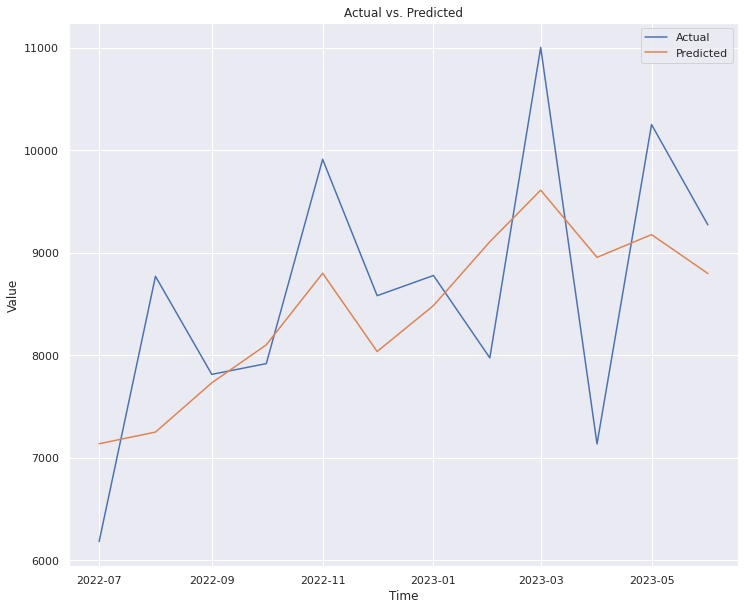

[]

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV



scaler=StandardScaler()
scaler_1=StandardScaler()
#scaler=MinMaxScaler()
#scaler_1=MinMaxScaler()

fold = 0
preds = []
scores = []

## Remove Duplicates
df_all_gen_1=data_model.copy()
df_all_gen=df_all_gen_1.drop_duplicates()


train = df_all_gen[:-12]
test = df_all_gen[-12:]



FEATURES = list(df_all_gen.columns.values)
FEATURES.remove('Month Year')
FEATURES.remove('Production')

TARGET = ['Production']
INDEX=['Month Year']

X_train = train[FEATURES]
X_train=X_train.fillna(0)
X_train.index= train[INDEX]
y_train = train[TARGET]
y_train.index= train[INDEX]

X_test = test[FEATURES]
X_test.index= test[INDEX]
y_test = test[TARGET]
#y_test.index= test[INDEX]
y_test_graph= test[INDEX]


# Scaling Features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = scaler_1.fit_transform(y_train)
y_test = scaler_1.transform(y_test)



# reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
#                        n_estimators=300,
#                        early_stopping_rounds=50,
#                        objective='reg:linear',
#                        max_depth=3,
#                        learning_rate=0.01)
# param_grid = {
#     'fit_intercept': [True, False],
# }
# lin_model= LinearRegression()
# reg = GridSearchCV(lin_model, param_grid, cv=3, scoring='neg_mean_squared_error')


#reg = RandomForestRegressor()
#reg = GradientBoostingRegressor()
#reg = xgb.XGBRegressor()

# ## RandomForestRegressor
# grid_param = {'n_estimators':[10,20,25,50,100,150,200,250,300,400], 'max_features':['sqrt','log2','auto'], 'max_depth':[3,5,7,12,30,40,50,'None'],
#               'min_samples_split':[3,5,7,10,20], 'min_samples_leaf':[3,5,7,10,15],'bootstrap': [True, False]}
# rf_ = RandomForestRegressor()
# reg = GridSearchCV(estimator=rf_,param_grid=grid_param, cv=3, verbose=2,scoring='neg_mean_absolute_error') #

#GradientBoosting Rregressor
# grid_param = {'learning_rate': [0.01,0.02,0.03,0.05,0.1],
#                   'subsample'    : [0.9, 0.5, 0.2, 0.1],
#                   'n_estimators' : [50,100,200,500,1000,1500],
#                   'max_depth'    : [2,4,6,15,10]
#                  }
#rf_ = GradientBoostingRegressor()
#reg = GridSearchCV(estimator=rf_,param_grid= grid_param, cv=3, verbose=2,scoring='neg_mean_absolute_error')
#reg = RandomizedSearchCV(estimator=rf_, param_distributions= grid_param, cv=3, scoring='neg_mean_squared_error')


# XGB Regressor
# rf_ = xgb.XGBRegressor()
# reg = GridSearchCV(estimator=rf_,param_grid=grid_param, cv=3, verbose=2,scoring='neg_mean_absolute_error')

## LightGBM Regressor
# rf_ = LGBMClassifier()
# reg = GridSearchCV(estimator=rf_,param_grid=grid_param, cv=3, verbose=2,scoring='neg_mean_absolute_error')

##Ridge Regressor
param_grid = {
    'alpha': [0.1,1,2,3,5, 8,10.0,12,15]  # Different values for the regularization strength (alpha)
}
param_grid = {'alpha':np.logspace(-6, 6, 13)}
ridge_model = Ridge()
reg = GridSearchCV(estimator=ridge_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)

#reg = Ridge()
#reg = Lasso()


reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)


# score = np.sqrt(mean_squared_error(y_test, y_pred))
# mse_overall = mean_absolute_percentage_error(y_test, y_pred)*100
# print(f"MAPE Test: {mse_overall}")
# #print("Parameters:",reg.best_params_)
# y_pred_1 = reg.predict(X_train)
# score = np.sqrt(mean_squared_error(y_train, y_pred_1))
# mse_overall = mean_absolute_percentage_error(y_test, y_pred)*100
# print(f"MAPE Train: {mse_overall}")

# # # # # Plot the variables on a line graph
# plt.plot(y_test.index,y_test, label='Actual')
# plt.plot(y_test.index,y_pred, label='Predicted')
# mse_overall = mean_absolute_percentage_error(y_test, y_pred)*100
# print(f"MAPE Train: {mse_overall}")

#Plot the variables on a line graph for scaled results
#y_pred_new=[[i] for i in y_pred]
#y_pred_inv = scaler_1.inverse_transform(y_pred_new)
y_pred_inv = scaler_1.inverse_transform(y_pred)
y_test_inv = scaler_1.inverse_transform(y_test)
plt.plot(y_test_graph,y_test_inv, label='Actual')
plt.plot(y_test_graph,y_pred_inv, label='Predicted')
mse_overall = mean_absolute_percentage_error(y_test_inv, y_pred_inv)*100
print(f"MAPE: {mse_overall}")

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs. Predicted')
#plt.ylim(5000, 11500)
plt.legend()
plt.show()

print(scores)


In [0]:
X_train

Out[108]: array([[-1.1785113 , -0.33334904, -1.00719681, ..., -0.32025631,
 -0.27386128, -0.27386128],
 [-1.1785113 , -0.33002239, -1.03136708, ..., -0.32025631,
 -0.27386128, -0.27386128],
 [-1.1785113 , -0.49137265, -0.99190924, ..., -0.32025631,
 -0.27386128, -0.27386128],
 ...,
 [ 1.52420795, 2.10733971, 1.00816456, ..., -0.32025631,
 -0.27386128, -0.27386128],
 [ 1.52420795, 1.39694043, 0.56158991, ..., -0.32025631,
 -0.27386128, -0.27386128],
 [ 1.52420795, 1.09034941, 0.43339127, ..., -0.32025631,
 -0.27386128, -0.27386128]])

In [0]:
coefficients = reg.best_estimator_.coef_

#print("Coefficients of# the Ridge model:")
#print(coefficients)
for col,coef in zip(list(FEATURES),list(coefficients[0])):
  print(col, " , ", coef)

print("intercept",reg.best_estimator_.intercept_)


Year , 0.017173125665266947
Dow Jones , 0.05191298894834503
Nasdaq , 0.009328166635086024
Nifty , -0.004137057521524202
Gulf Tension , -0.06558620342357423
India inflation , 0.017619575258571545
Crude Oil WTI Futures , 0.021086016795549545
Dow Jones Commodity Energy , 0.027585067354027742
Dow Jones Commodity Petroleum , 0.028719030269576246
Dow Jones Commodity Unleaded Gasoline , 0.03274408592822967
Gasoline RBOB Futures , 0.0030177293180975243
Gold Futures , 0.042416923321011324
EUR_USD , -0.022290344029554113
Euro Stoxx 50 , 0.0724400472837364
S&P 500 , 0.01805555746904623
Gold Reserves France , 0.022047592284214053
Gold Reserves India , 0.04533197435649976
Gold Reserves UAE , 0.03426507467113793
Inflation Rate France , 0.022007161254747266
Inflation Rate Italy , 0.02284248523232642
Inflation Rate Pakistan , 0.10036606950881594
Money Supply M1 China , 0.05260407392285737
Money Supply M1 France , 0.04488891672669988
Money Supply M1 India , 0.019070701944692688
Money Supply M1 Italy , 0.014015515032872058
Money Supply M1 Pakistan , 0.03974821880355901
Money Supply M1 Russia , 0.023211578861930836
Interest Rates Pakistan , 0.038478988456636
Interest Rates UAE , -0.0026949926300692817
Interest Rates UK , 0.04642693785416527
inflation rate UK , 0.06806048456412023
Money Supply M1 UK , 0.021023927183524728
UAE Stocks , 0.05768416543687549
USD_PKR , 0.036283001506619124
China Oil Production , 0.047234770988292527
UK Oil Production , -0.009809646562215937
India Oil Production , 0.0014925508336529978
AED_INR , -0.0038289750817561974
INR_USD , 0.011081559306115582
Month__1 , -0.03691756689552481
Month__2 , -0.022815170572291345
Month__3 , 0.03980762905394389
Month__4 , -0.026090332433762783
Month__5 , -0.027700404488802274
Month__6 , 0.03250566310554279
Month__7 , -0.014122232765695755
Month__8 , -0.06303941810255416
Month__9 , 0.02845024832048147
Month__10 , 0.04585949424454198
Month__11 , 0.09798863535997944
Month__12 , -0.054578264113790076
intercept [7.7856434e-15]

In [0]:
## For Min Max Scaler
# print(scaler.data_min_)
# print(scaler.data_max_)

# print(scaler_1.data_min_)
# print(scaler_1.data_max_)

## For Standard Scaler
print(scaler.mean_)
print(scaler.var_)

print(scaler_1.mean_)
print(scaler_1.var_)

[2.74418605e+00 1.50063190e+02 1.03758696e+04 1.34374249e+04
 2.00697674e-01 4.63093023e-02 6.89584467e+01 1.10875900e+02
 1.11782732e+02 5.72519376e+02 1.84293277e+00 1.54991208e+03
 1.15281820e+00 3.66108458e+03 3.47508305e+03 2.43618302e+03
 6.56402558e+02 2.97446785e+01 1.97691645e+00 1.97990525e+00
 9.06425926e+00 5.80902139e+04 1.52953634e+06 4.05727475e+04
 1.32753295e+06 1.62971908e+07 2.67109457e+04 9.32267442e+00
 2.03488372e+00 5.16279070e-01 3.08372093e+00 2.01073667e+06
 3.56867229e+03 1.51124858e+02 3.91054873e+03 9.23818019e+02
 6.49405925e+02 1.95285858e+01 1.39648638e-02 9.30232558e-02
 9.30232558e-02 9.30232558e-02 9.30232558e-02 9.30232558e-02
 9.30232558e-02 6.97674419e-02 6.97674419e-02 6.97674419e-02
 9.30232558e-02 6.97674419e-02 6.97674419e-02]
[2.19037317e+00 1.00648941e+03 1.26720644e+07 7.74183145e+06
 1.08619719e+00 2.10194332e-04 2.39464654e+02 7.52880014e+02
 6.19974704e+02 2.23001630e+04 1.42320331e-01 6.52155791e+04
 2.08525661e-03 1.16361496e+05 5.60459831e+05 5.75094646e-02
 5.45111314e+03 4.97175748e+02 1.46393010e+00 3.93259779e+00
 1.20923275e+01 1.94710009e+07 6.64445036e+10 6.30989022e+07
 2.77414881e+10 1.05917306e+13 4.34703075e+07 6.86717482e+00
 2.42969173e-01 9.38047593e-02 4.72415360e+00 8.28502903e+10
 2.66165534e+05 5.26733454e+02 1.82380505e+04 1.52517515e+04
 1.66194236e+03 8.37557947e-01 4.52033060e-07 8.43699297e-02
 8.43699297e-02 8.43699297e-02 8.43699297e-02 8.43699297e-02
 8.43699297e-02 6.48999459e-02 6.48999459e-02 6.48999459e-02
 8.43699297e-02 6.48999459e-02 6.48999459e-02]
[3616.37209302]
[2506250.60573283]

In [0]:
FEATURES_p1=['Input_1','Input_2','Input_3','Input_4']

#FEATURES_p2=['xyz','Dow Jones', 'Nasdaq', 'Nifty', 'Gulf Tension', 'India inflation', 'Crude Oil WTI Futures', 'Dow Jones Commodity Energy', 'Dow Jones Commodity Petroleum', 'Dow Jones Commodity Unleaded Gasoline', 'Gasoline RBOB Futures', 'Gold Futures', 'EUR_USD', 'Euro Stoxx 50', 'S&P 500', 'Gold Reserves France', 'Gold Reserves India', 'Gold Reserves UAE', 'Inflation Rate France', 'Inflation Rate Italy', 'Inflation Rate Pakistan', 'Money Supply M1 China', 'Money Supply M1 France', 'Money Supply M1 India', 'Money Supply M1 Italy', 'Money Supply M1 Pakistan', 'Money Supply M1 Russia', 'Interest Rates Pakistan', 'Interest Rates UAE', 'Interest Rates UK', 'inflation rate UK', 'Money Supply M1 UK', 'UAE Stocks', 'USD_PKR', 'China Oil Production', 'UK Oil Production', 'India Oil Production', 'AED_INR', 'INR_USD']

#Use when using RFE
FEATURES_p2=['xyz','Dow Jones',
 'Nifty',
 'Gulf Tension',
 'India inflation',
 'Euro Stoxx 50',
 'Gold Reserves India',
 'Gold Reserves UAE',
 'Inflation Rate Italy',
 'Inflation Rate Pakistan',
 'Money Supply M1 China',
 'Money Supply M1 France',
 'Money Supply M1 Italy',
 'Money Supply M1 Pakistan',
 'Interest Rates UK',
 'inflation rate UK',
 'UAE Stocks',
 'China Oil Production',
 'India Oil Production']

FEATURES_p3=['Year','Month__1','Month__2','Month__3','Month__4','Month__5','Month__6','Month__7','Month__8','Month__9','Month__10','Month__11','Month__12']

In [0]:
past_months=-12

### Predict the 12 Month Line
df_all_gen_2=df_all_gen.drop_duplicates()
X_test_12_months=pd.DataFrame()
y_test_12_months=df_all_gen_2[past_months:]['Production']

df_all_gen_2['xyz']=0
## Forecast of Features P2
for col in FEATURES_p2:
  #Add CAGR
  if df_all_gen_2.iloc[past_months-1][col]!=0:
    cagr=(((df_all_gen_2.iloc[past_months-1][col]/df_all_gen_2.iloc[past_months-14][col])**0.0833)-1).real
  else:
    cagr=0
  # Keep Variable's Constant
  #cagr=0
  if math.isnan(cagr):
    cagr=0
  #print(df_all_gen_2.iloc[past_months-1][col],df_all_gen_2.iloc[past_months-14][col])
  print(col,cagr)

  if (np.abs(df_all_gen_2.iloc[past_months-1][col])<10) & (np.abs(cagr)<0.1): #col in ['Gulf Tension','India inflation']:
    print(col)
    X_test_12_months[col]=0.0   
  else:
    X_test_12_months[col]=0
  

  #X_test_12_months[col]=0
    

  for i in range(past_months,0,1):
    if i==past_months:
      X_test_12_months.at[i,col]=df_all_gen_2.iloc[past_months-1][col]*(1+cagr)
    else:
      X_test_12_months.at[i,col]=float(X_test_12_months.iloc[i+((-1*past_months)-1)][col]*(1+cagr)) #(i+((past_months*-1)-1)) -11+12=1  -1+12=11


# Variables P3 remains same
#P3_data=df_all_gen_2.iloc[past_months:][FEATURES_p3].reset_index()
P3_data=df_all_gen_2.iloc[past_months:-6][FEATURES_p3].reset_index()
X_test_12_months=X_test_12_months.drop(['xyz'],axis=1)

X_test_new=pd.concat([X_test_12_months.reset_index(),P3_data],axis=1)

xyz 0
xyz
Dow Jones 0.0049074867117286924
Nifty 0.0010500673018201123
Gulf Tension -0.016319697207163975
Gulf Tension
India inflation 0.009470585927031872
India inflation
Euro Stoxx 50 -0.010980706934943907
Gold Reserves India 0.007296930643252653
Gold Reserves UAE -1.5075445178425184e-05
Inflation Rate Italy 0.16341836406173238
Inflation Rate Pakistan 0.06817619637350325
Money Supply M1 China 0.0046977977998323706
Money Supply M1 France 0.0050876270500122
Money Supply M1 Italy 0.0039846127116092145
Money Supply M1 Pakistan 0.009251869497102438
Interest Rates UK 0.23416323270040373
inflation rate UK 0.11663991386782713
UAE Stocks 0.00971467624507416
China Oil Production 0.002595345383498593
India Oil Production 0.0011149781711372597

In [0]:
#X_test_12_months
X_test_new

Out[125]:

,index,Dow Jones,Nasdaq,Nifty,Gulf Tension,India inflation,Crude Oil WTI Futures,Dow Jones Commodity Energy,Dow Jones Commodity Petroleum,Dow Jones Commodity Unleaded Gasoline,Gasoline RBOB Futures,Gold Futures,EUR_USD,Euro Stoxx 50,S&P 500,Gold Reserves France,Gold Reserves India,Gold Reserves UAE,Inflation Rate France,Inflation Rate Italy,Inflation Rate Pakistan,Money Supply M1 China,Money Supply M1 France,Money Supply M1 India,Money Supply M1 Italy,Money Supply M1 Pakistan,Money Supply M1 Russia,Interest Rates Pakistan,Interest Rates UAE,Interest Rates UK,inflation rate UK,Money Supply M1 UK,UAE Stocks,USD_PKR,China Oil Production,UK Oil Production,India Oil Production,AED_INR,INR_USD,index,Year,Month__1,Month__2,Month__3,Month__4,Month__5,Month__6,Month__7,Month__8,Month__9,Month__10,Month__11,Month__12
0,-18,189,17015,17683,-0.95,0.055381,72,118,116,590,1.971121,1813,1.132022,4222,4819,2436,764,59,2.949429,4,12,65377,1904591,52820,1599466,20960286,37264,9.504037,1.464481,0.228137,6,2431821,4525,179,3891,785,599,20,0.013205,39,5,1,0,0,0,0,0,0,0,0,0,0,0
1,-17,195,17943,18206,-0.95,0.054189,73,120,117,602,2.020837,1842,1.133832,4265,4978,2436,775,63,3.106832,4,11,66016,1946374,54299,1628594,21489815,38563,9.264279,1.429804,0.208186,6,2487620,4652,181,3899,768,596,20,0.013143,40,5,0,1,0,0,0,0,0,0,0,0,0,0
2,-16,202,18921,18745,-0.95,0.053022,74,122,118,614,2.071807,1871,1.135645,4308,5142,2436,786,67,3.272635,4,10,66662,1989074,55819,1658252,22032722,39907,9.030569,1.395947,0.189980,6,2544699,4782,183,3907,752,593,20,0.013080,41,5,0,0,1,0,0,0,0,0,0,0,0,0
3,-15,209,19953,19300,-0.95,0.051881,75,124,119,626,2.124062,1900,1.137462,4351,5311,2436,797,72,3.447287,4,9,67314,2032711,57381,1688450,22589345,41298,8.802755,1.362893,0.173366,6,2603088,4916,185,3915,736,590,20,0.013018,42,5,0,0,0,1,0,0,0,0,0,0,0,0
4,-14,216,21041,19871,-0.95,0.050764,76,126,120,639,2.177635,1930,1.139281,4395,5486,2436,808,77,3.631260,4,8,67972,2077305,58987,1719198,23160030,42738,8.580688,1.330621,0.158205,6,2662817,5053,187,3923,720,587,20,0.012956,43,5,0,0,0,0,1,0,0,0,0,0,0,0
5,-13,223,22188,20459,-0.95,0.049671,77,128,121,652,2.232559,1960,1.141103,4439,5667,2436,819,83,3.825051,4,7,68637,2122877,60638,1750506,23745132,44228,8.364223,1.299113,0.144369,6,2723916,5194,189,3931,705,584,20,0.012895,44,5,0,0,0,0,0,1,0,0,0,0,0,0
6,-12,231,23398,21065,-0.95,0.048602,78,130,122,665,2.288869,1991,1.142927,4484,5854,2436,830,89,4.029184,4,6,69308,2169449,62335,1782385,24345016,45770,8.153219,1.268351,0.131744,6,2786417,5339,191,3939,690,581,20,0.012834,45,5,0,0,0,0,0,0,1,0,0,0,0,0
7,-11,239,24674,21689,-0.95,0.047555,79,132,123,679,2.346599,2022,1.144755,4529,6047,2436,841,95,4.244211,4,5,69986,2217043,64080,1814844,24960055,47366,7.947538,1.238318,0.120223,6,2850352,5488,193,3947,675,578,20,0.012773,46,5,0,0,0,0,0,0,0,1,0,0,0,0
8,-10,247,26020,22331,-0.95,0.046532,80,134,124,693,2.405785,2054,1.146586,4575,6246,2436,853,102,4.470713,4,4,70670,2265681,65874,1847894,25590632,49017,7.747046,1.208996,0.109709,6,2915754,5642,195,3955,661,575,20,0.012712,47,5,0,0,0,0,0,0,0,0,1,0,0,0
9,-9,255,27439,22992,-0.95,0.045530,81,136,125,707,2.466464,2086,1.148420,4621,6452,2436,865,109,4.709303,4,3,71361,2315386,67718,1881546,26237140,50726,7.551611,1.180368,0.100115,6,2982657,5800,197,3963,647,572,20,0.012652,48,5,0,0,0,0,0,0,0,0,0,1,0,0


MAPE: 11.495514748796971

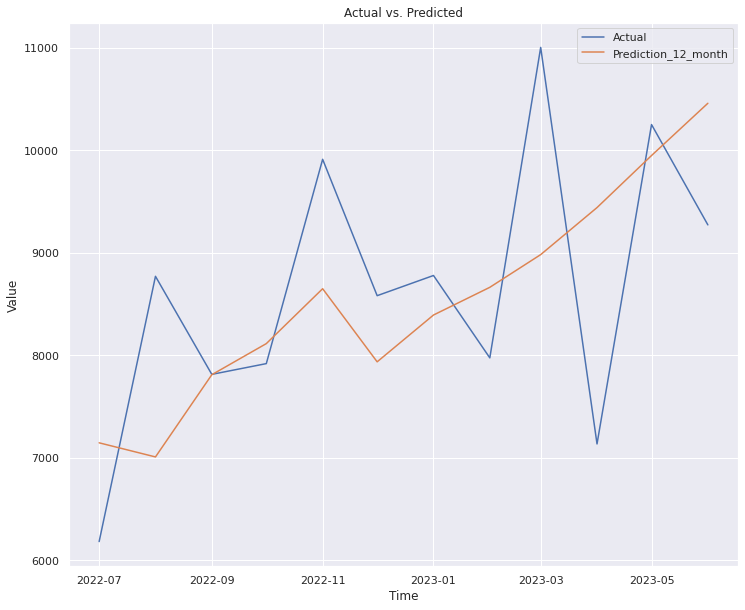

In [0]:
test_12_months=df_all_gen_2[past_months:]
y_graph_index=df_all_gen_2[past_months:][INDEX]


y_test_12_months = test_12_months[TARGET]

# Scaling Features
X_test_new=X_test_new.fillna(0)
X_test = scaler.transform(X_test_new[FEATURES])
y_test = scaler_1.transform(y_test_12_months)
#y_test=y_test_12_months


y_pred = reg.predict(X_test)


#Plot the variables on a line graph for scaled results
y_pred_inv = scaler_1.inverse_transform(y_pred)
y_test_inv = scaler_1.inverse_transform(y_test)
plt.plot(y_graph_index,y_test_inv, label='Actual')
plt.plot(y_graph_index,y_pred_inv, label='Prediction_12_month')
mse_overall = mean_absolute_percentage_error(y_test_inv, y_pred_inv)*100
print(f"MAPE: {mse_overall}")

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs. Predicted')
#plt.ylim(5000, 11500)
plt.legend()
plt.show()

In [0]:
print("Y Actual",y_test_inv)
print("Y Predicted",y_pred_inv)

mse_overall_annual = (y_test_inv.sum()-y_pred_inv.sum())/y_test_inv.sum()
print("MAPE Annual",mse_overall_annual)

Y Actual [[ 6182.]
 [ 8771.]
 [ 7814.]
 [ 7919.]
 [ 9913.]
 [ 8582.]
 [ 8779.]
 [ 7975.]
 [11005.]
 [ 7135.]
 [10252.]
 [ 9273.]]
Y Predicted [[ 7130.78289821]
 [ 7029.69123498]
 [ 7803.94380937]
 [ 8087.50800228]
 [ 8662.37842596]
 [ 7951.51820019]
 [ 8439.5860453 ]
 [ 8681.56806714]
 [ 8948.39530633]
 [ 9312.2114846 ]
 [ 9698.92163929]
 [10089.78641937]]
MAPE Annual 0.017024213001891633

In [0]:
past_months=-18

### Predict the 12 Month Line
df_all_gen_2=df_all_gen.drop_duplicates()
X_test_12_months=pd.DataFrame()
#y_test_12_months=df_all_gen_2[past_months:]['Production']
y_test_12_months=df_all_gen_2[past_months:-6]['Production']

df_all_gen_2['xyz']=0
## Forecast of Features P2
for col in FEATURES_p2:
  #Add CAGR
  if df_all_gen_2.iloc[past_months-1][col]!=0:
    cagr=(((df_all_gen_2.iloc[past_months-1][col]/df_all_gen_2.iloc[past_months-14][col])**0.0833)-1).real
  else:
    cagr=0
  # Keep Variable's Constant
  #cagr=0
  if math.isnan(cagr):
    cagr=0
  #print(df_all_gen_2.iloc[past_months-1][col],df_all_gen_2.iloc[past_months-14][col])
  print(col,cagr)

  if (np.abs(df_all_gen_2.iloc[past_months-1][col])<10) & (np.abs(cagr)<0.1): #col in ['Gulf Tension','India inflation']:
    print(col)
    X_test_12_months[col]=0.0   
  else:
    X_test_12_months[col]=0
  

  #X_test_12_months[col]=0
    
  for i in range(past_months,-6,1):
  #for i in range(past_months,0,1):
    if i==past_months:
      X_test_12_months.at[i,col]=df_all_gen_2.iloc[past_months-1][col]*(1+cagr)
    else:
      X_test_12_months.at[i,col]=float(X_test_12_months.iloc[i+((-1*past_months)-1)][col]*(1+cagr)) #(i+((past_months*-1)-1)) -11+12=1  -1+12=11


# Variables P3 remains same
#P3_data=df_all_gen_2.iloc[past_months:][FEATURES_p3].reset_index()
P3_data=df_all_gen_2.iloc[past_months:-6][FEATURES_p3].reset_index()
X_test_12_months=X_test_12_months.drop(['xyz'],axis=1)

X_test_new=pd.concat([X_test_12_months.reset_index(),P3_data],axis=1)

xyz 0
xyz
Dow Jones 0.03624666551795008
Nifty 0.02962401981386753
<command-3521341827226557>:14: RuntimeWarning: invalid value encountered in double_scalars
 cagr=(((df_all_gen_2.iloc[past_months-1][col]/df_all_gen_2.iloc[past_months-14][col])**0.0833)-1).real
Gulf Tension 0
Gulf Tension
India inflation -0.021529191863576713
India inflation
Euro Stoxx 50 0.010208054715699522
Gold Reserves India 0.014427603790817978
Gold Reserves UAE 0.07803590765868229
Inflation Rate Italy 0.186619498578384
Inflation Rate Pakistan -0.0020053127149701755
Money Supply M1 China 0.009785987727458867
Money Supply M1 France 0.021938481064114557
Money Supply M1 Italy 0.018211319339771492
Money Supply M1 Pakistan 0.025263470344988992
Interest Rates UK -0.08745182796352702
Interest Rates UK
inflation rate UK 0.12594433180637132
UAE Stocks 0.028068480987991418
China Oil Production 0.0021913116090386264
India Oil Production -0.004113204128667558

MAPE: 13.42592088988647

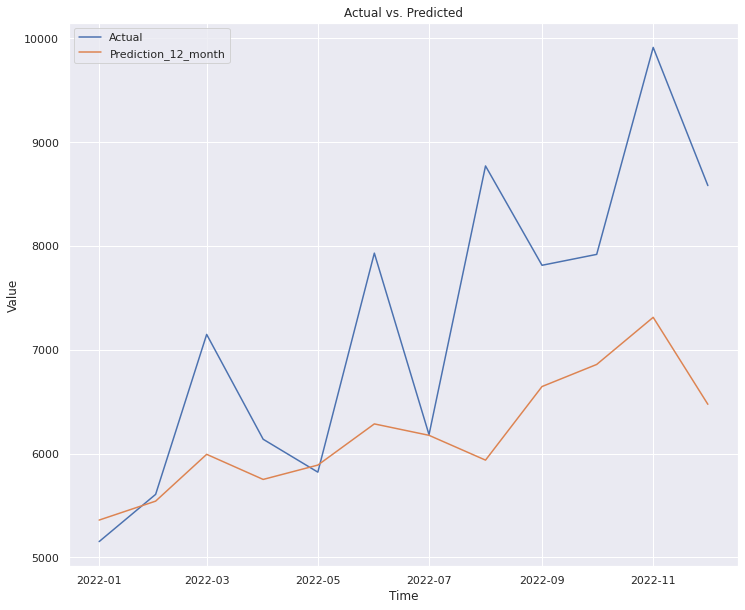

In [0]:
test_12_months=df_all_gen_2[past_months:-6]
y_graph_index=df_all_gen_2[past_months:-6][INDEX]

y_test_12_months = test_12_months[TARGET]

# Scaling Features
X_test_new=X_test_new.fillna(0)
X_test = scaler.transform(X_test_new[FEATURES])
y_test = scaler_1.transform(y_test_12_months)
#y_test=y_test_12_months


y_pred = reg.predict(X_test)


#Plot the variables on a line graph for scaled results
y_pred_inv = scaler_1.inverse_transform(y_pred)
y_test_inv = scaler_1.inverse_transform(y_test)
plt.plot(y_graph_index,y_test_inv, label='Actual')
plt.plot(y_graph_index,y_pred_inv, label='Prediction_12_month')
mse_overall = mean_absolute_percentage_error(y_test_inv, y_pred_inv)*100
print(f"MAPE: {mse_overall}")

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs. Predicted')
#plt.ylim(5000, 11500)
plt.legend()
plt.show()

In [0]:
print("Y Actual",y_test_inv)
print("Y Predicted",y_pred_inv)

mse_overall_annual = (y_test_inv.sum()-y_pred_inv.sum())/y_test_inv.sum()
print("MAPE Annual",mse_overall_annual)

Y Actual [[5152.]
 [5607.]
 [7148.]
 [6138.]
 [5821.]
 [7931.]
 [6182.]
 [8771.]
 [7814.]
 [7919.]
 [9913.]
 [8582.]]
Y Predicted [[5239.32840605]
 [5429.23149096]
 [5889.07423871]
 [5654.08044385]
 [5773.50514714]
 [6235.45021158]
 [6110.83162231]
 [5950.8653492 ]
 [6670.86182286]
 [6898.94778937]
 [7422.01673084]
 [6644.55033788]]
MAPE Annual 0.15014436304869774

In [0]:
test_12_months=df_all_gen_2[past_months:]
y_test_12_months = test_12_months[TARGET]
y_test = scaler_1.transform(y_test_12_months)
y_graph_index=df_all_gen_2[past_months:][INDEX]

X_test_new['Input_1']=0
X_test_new['Input_2']=0
X_test_new['Input_3']=0
X_test_new['Input_4']=0
test_12_months=X_test_new[FEATURES]
test_12_months['Input_2']=0
test_12_months['Input_4']=0

test_12_months.reset_index(inplace=True)


y_pred=[]
## Start Modifying 
## Month1 
test_12_months.at[0,'Input_1']=train.iloc[-1][TARGET]  
test_12_months.at[0,'Input_2']=train.iloc[-2][TARGET]
test_12_months.at[0,'Input_3']=train.iloc[-3][TARGET]
test_12_months.at[0,'Input_4']=train.iloc[-4][TARGET]

X_test_1 = scaler.transform([test_12_months.iloc[0][FEATURES]])
y_pred_1 = reg.predict(X_test_1)
y_pred.append(y_pred_1)


# ## Month2 
test_12_months.at[1,'Input_1']=scaler_1.inverse_transform(y_pred[0])
test_12_months.at[1,'Input_2']=test_12_months.iloc[0]['Input_1']
test_12_months.at[1,'Input_3']=test_12_months.iloc[0]['Input_2']
test_12_months.at[1,'Input_4']=test_12_months.iloc[0]['Input_3']

X_test_2 = scaler.transform([X_test_new.iloc[1][FEATURES]])
y_pred_2 = reg.predict(X_test_2)
y_pred.append(y_pred_2)


## Month 3
test_12_months.at[2,'Input_1']=scaler_1.inverse_transform(y_pred[1])
test_12_months.at[2,'Input_2']=scaler_1.inverse_transform(y_pred[0])
test_12_months.at[2,'Input_3']=test_12_months.iloc[0]['Input_1']
test_12_months.at[2,'Input_4']=test_12_months.iloc[0]['Input_2']

X_test_3 = scaler.transform([X_test_new.iloc[2][FEATURES]])
y_pred_3 = reg.predict(X_test_3)
y_pred.append(y_pred_3)

## Month 4
test_12_months.at[3,'Input_1']=scaler_1.inverse_transform(y_pred[2])
test_12_months.at[3,'Input_2']=scaler_1.inverse_transform(y_pred[1])
test_12_months.at[3,'Input_3']=scaler_1.inverse_transform(y_pred[0])
test_12_months.at[3,'Input_4']=test_12_months.iloc[0]['Input_1']

X_test_4 = scaler.transform([X_test_new.iloc[3][FEATURES]])
y_pred_4 = reg.predict(X_test_4)
y_pred.append(y_pred_4)

for i in range (4,len(test_12_months)):
  test_12_months.at[i,'Input_1']=scaler_1.inverse_transform(y_pred[i-1])
  test_12_months.at[i,'Input_2']=scaler_1.inverse_transform(y_pred[i-2])
  test_12_months.at[i,'Input_3']=scaler_1.inverse_transform(y_pred[i-3])
  test_12_months.at[i,'Input_4']=scaler_1.inverse_transform(y_pred[i-4])

  X_test_i = scaler.transform([X_test_new.iloc[i][FEATURES]])
  y_pred_i = reg.predict(X_test_i)
  y_pred.append(y_pred_i)



<command-3521341827226571>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 test_12_months['Input_2']=0
<command-3521341827226571>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 test_12_months['Input_4']=0
/databricks/python/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 self.obj[key] = infer_fill_value(value)

--------------------------------------------------------------------------- 
 KeyError Traceback (most recent call last)
 /databricks/python/lib/python3.8/site-packages/pandas/core/indexes/base.py in get_loc (self, key, method, tolerance) 
 3079 try : 
 -> 3080 return self . _engine . get_loc ( casted_key ) 
 3081 except KeyError as err : 

 pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_loc () 

 pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_loc () 

 pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item () 

 pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item () 

 KeyError : 'Input_1'

The above exception was the direct cause of the following exception:

 KeyError Traceback (most recent call last)
 /databricks/python/lib/python3.8/site-packages/pandas/core/frame.py in _set_value (self, index, col, value, takeable) 
 3267 
 -> 3268 series = self . _get_item_cache ( col ) 
 3269 engine = self . index . _engine

 /databricks/python/lib/python3.8/site-packages/pandas/core/generic.py in _get_item_cache (self, item) 
 3791 
 -> 3792 loc = self . columns . get_loc ( item ) 
 3793 values = self . _mgr . iget ( loc ) 

 /databricks/python/lib/python3.8/site-packages/pandas/core/indexes/base.py in get_loc (self, key, method, tolerance) 
 3081 except KeyError as err : 
 -> 3082 raise KeyError ( key ) from err
 3083 

 KeyError : 'Input_1'

During handling of the above exception, another exception occurred:

 ValueError Traceback (most recent call last)
 <command-3521341827226571> in <module> 
 18 ## Start Modifying 
 19 ## Month1 
 ---> 20 test_12_months . at [ 0 , 'Input_1' ] = train . iloc [ - 1 ] [ TARGET ] 
 21 test_12_months . at [ 0 , 'Input_2' ] = train . iloc [ - 2 ] [ TARGET ] 
 22 test_12_months . at [ 0 , 'Input_3' ] = train . iloc [ - 3 ] [ TARGET ] 

 /databricks/python/lib/python3.8/site-packages/pandas/core/indexing.py in __setitem__ (self, key, value) 
 2165 return 
 2166 
 -> 2167 return super ( ) . __setitem__ ( key , value ) 
 2168 
 2169 

 /databricks/python/lib/python3.8/site-packages/pandas/core/indexing.py in __setitem__ (self, key, value) 
 2116 raise ValueError ( "Not enough indexers for scalar access (setting)!" ) 
 2117 
 -> 2118 self . obj . _set_value ( * key , value = value , takeable = self . _takeable ) 
 2119 
 2120 

 /databricks/python/lib/python3.8/site-packages/pandas/core/frame.py in _set_value (self, index, col, value, takeable) 
 3279 self . iloc [ index , col ] = value
 3280 else : 
 -> 3281 self . loc [ index , col ] = value
 3282 self . _item_cache . pop ( col , None ) 
 3283 

 /databricks/python/lib/python3.8/site-packages/pandas/core/indexing.py in __setitem__ (self, key, value) 
 690 
 691 iloc = self if self . name == "iloc" else self . obj . iloc
 --> 692 iloc . _setitem_with_indexer ( indexer , value , self . name ) 
 693 
 694 def _validate_key ( self , key , axis : int ) : 

 /databricks/python/lib/python3.8/site-packages/pandas/core/indexing.py in _setitem_with_indexer (self, indexer, value, name) 
 1602 indexer , self . obj . axes
 1603 )
 -> 1604 self . _setitem_with_indexer ( new_indexer , value , name ) 
 1605 
 1606 return 

 /databricks/python/lib/python3.8/site-packages/pandas/core/indexing.py in _setitem_with_indexer (self, indexer, value, name) 
 1633 if take_split_path : 
 1634 # We have to operate column-wise 
 -> 1635 self . _setitem_with_indexer_split_path ( indexer , value , name ) 
 1636 else : 
 1637 self . _setitem_single_block ( indexer , value , name ) 

 /databricks/python/lib/python3.8/site-packages/pandas/core/indexing.py in _setitem_with_indexer_split_path (self, indexer, value, name) 
 1652 
 1653 if isinstance ( value , ABCSeries ) and name != "iloc" : 
 -> 1654 value = self . _align_series ( indexer , value ) 
 1655 
 1656 # Ensure we have something we can iterate over 

 /databricks/python/lib/python3.8/site-packages/pandas/core/indexing.py in _al

In [0]:
y_pred_new=[list(i[0]) for i in y_pred]


#Plot the variables on a line graph for scaled results
y_pred_inv = scaler_1.inverse_transform(y_pred_new)
y_test_inv = scaler_1.inverse_transform(y_test)
plt.plot(y_graph_index,y_test_inv, label='Actual')
plt.plot(y_graph_index,y_pred_inv, label='Prediction_12_month')
mse_overall = mean_absolute_percentage_error(y_test_inv, y_pred_inv)*100
print(f"MAPE: {mse_overall}")

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs. Predicted')
#plt.ylim(5000, 11500)
plt.legend()
plt.show()

--------------------------------------------------------------------------- 
 ValueError Traceback (most recent call last)
 <command-3521341827226572> in <module> 
 3 
 4 #Plot the variables on a line graph for scaled results 
 ----> 5 y_pred_inv = scaler_1 . inverse_transform ( y_pred_new ) 
 6 y_test_inv = scaler_1 . inverse_transform ( y_test ) 
 7 plt . plot ( y_graph_index , y_test_inv , label = 'Actual' ) 

 /databricks/python/lib/python3.8/site-packages/sklearn/preprocessing/_data.py in inverse_transform (self, X, copy) 
 1044 
 1045 copy = copy if copy is not None else self . copy
 -> 1046 X = check_array(
 1047 X , 
 1048 accept_sparse = "csr" , 

 /databricks/python/lib/python3.8/site-packages/sklearn/utils/validation.py in check_array (array, accept_sparse, accept_large_sparse, dtype, order, copy, force_all_finite, ensure_2d, allow_nd, ensure_min_samples, ensure_min_features, estimator, input_name) 
 938 # If input is 1D raise error 
 939 if array . ndim == 1 : 
 --> 940 raise ValueError(
 941 "Expected 2D array, got 1D array instead:\narray={}.\n" 
 942 "Reshape your data either using array.reshape(-1, 1) if " 

 ValueError : Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [0]:
# mse_overall = mean_absolute_percentage_error(y_test, y_pred)
# print("MAPE",mse_overall)

# mse_overall_annual = (y_test.sum()-y_pred.sum())/y_test.sum()
# print("MAPE Annual",mse_overall_annual)

mse_overall_annual = (y_test_inv.sum()-y_pred_inv.sum())/y_test_inv.sum()
print("MAPE Annual",mse_overall_annual)

In [0]:
test = df_all_gen[-12:]
test['Month']=test['Month Year'].dt.month
test['Year']=test['Month Year'].dt.year

FEATURES = list(df_all_gen.columns.values)
FEATURES.remove('Month Year')
FEATURES.remove('Production')

TARGET = ['Production']
INDEX=['Month Year']


X_test = test[FEATURES]
X_test.index= test[INDEX]
y_test = test[TARGET]
y_test.index= test[INDEX]
y_test_graph= test[INDEX]

# Scaling Features
X_test = scaler.transform(X_test)
y_test = scaler_1.transform(y_test)

y_pred = reg.predict(X_test)


# Plot the results for each feature
#plt.figure(figsize=(10, 6))
# plt.plot(y_test, label=f'Actual')
# plt.plot(y_test.index,y_pred, label=f'Predicted')

#Plot the variables on a line graph for scaled results
y_pred_inv = scaler_1.inverse_transform(y_pred)
y_test_inv = scaler_1.inverse_transform(y_test)
plt.plot(y_test_graph,y_test_inv, label='Actual')
plt.plot(y_test_graph,y_pred_inv, label='Predicted')


plt.ylim(0, 11500)
#plt.ylim(0, 1500)
#plt.ylim(0, 800)
plt.xlabel('Time')
plt.ylabel('Value')

plt.legend()
plt.show()

mse_overall = mean_absolute_percentage_error(y_test_inv, y_pred_inv)*100
print(f"MAPE: {mse_overall}")

In [0]:
from sklearn.feature_selection import RFE

# Perform Recursive Feature Elimination with Ridge Regression
reg = Ridge()
rfe = RFE(estimator=reg)
rfe.fit(X_train, y_train)

# Get the selected features and their ranking
selected_features = rfe.support_
feature_ranking = rfe.ranking_

# Print the results
#print("Selected Features:", selected_features)
#print("Feature Ranking:", feature_ranking)

cols_to_use=[]
for col,coef in zip(list(FEATURES),list(feature_ranking)):
  print(col, " - ", coef)
  if coef==1 or 'Month' in col or 'Year' in col:
    cols_to_use.append(col)

cols_to_use

Year - 21
Dow Jones - 1
Nasdaq - 17
Nifty - 1
Gulf Tension - 1
India inflation - 1
Crude Oil WTI Futures - 22
Dow Jones Commodity Energy - 13
Dow Jones Commodity Petroleum - 12
Dow Jones Commodity Unleaded Gasoline - 23
Gasoline RBOB Futures - 9
Gold Futures - 4
EUR_USD - 10
Euro Stoxx 50 - 1
S&P 500 - 11
Gold Reserves France - 14
Gold Reserves India - 1
Gold Reserves UAE - 1
Inflation Rate France - 25
Inflation Rate Italy - 1
Inflation Rate Pakistan - 1
Money Supply M1 China - 1
Money Supply M1 France - 1
Money Supply M1 India - 15
Money Supply M1 Italy - 1
Money Supply M1 Pakistan - 1
Money Supply M1 Russia - 5
Interest Rates Pakistan - 20
Interest Rates UAE - 3
Interest Rates UK - 1
inflation rate UK - 1
Money Supply M1 UK - 26
UAE Stocks - 1
USD_PKR - 24
China Oil Production - 1
UK Oil Production - 6
India Oil Production - 1
AED_INR - 18
INR_USD - 8
Month__1 - 1
Month__2 - 2
Month__3 - 16
Month__4 - 1
Month__5 - 1
Month__6 - 19
Month__7 - 27
Month__8 - 1
Month__9 - 7
Month__10 - 1
Month__11 - 1
Month__12 - 1
Out[119]: ['Year',
 'Dow Jones',
 'Nifty',
 'Gulf Tension',
 'India inflation',
 'Euro Stoxx 50',
 'Gold Reserves India',
 'Gold Reserves UAE',
 'Inflation Rate Italy',
 'Inflation Rate Pakistan',
 'Money Supply M1 China',
 'Money Supply M1 France',
 'Money Supply M1 Italy',
 'Money Supply M1 Pakistan',
 'Interest Rates UK',
 'inflation rate UK',
 'UAE Stocks',
 'China Oil Production',
 'India Oil Production',
 'Month__1',
 'Month__2',
 'Month__3',
 'Month__4',
 'Month__5',
 'Month__6',
 'Month__7',
 'Month__8',
 'Month__9',
 'Month__10',
 'Month__11',
 'Month__12']

In [0]:
mean_absolute_percentage_error(scaler_1.inverse_transform(rfe.predict(X_test)),y_test_inv)

Out[160]: 0.14370738829860133

In [0]:
(y_test_inv.sum()-scaler_1.inverse_transform(rfe.predict(X_test)).sum())/y_test_inv.sum()

Out[161]: 0.10859691891597566